In [1]:
from importlib import reload
import article
reload(article)
from article import *

import warnings
warnings.simplefilter("ignore")

torch.device("cuda" if torch.cuda.is_available() else "cpu")

2024-10-23 23:05:54.268059: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:05:54.322728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:05:54.324626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 23:05:55.507929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


device(type='cpu')

# Fashion MNIST Dataset

- Github: https://github.com/zalandoresearch/fashion-mnist

## Data loading

2024-10-23 23:05:59.553854: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156800000 exceeds 10% of free system memory.
2024-10-23 23:05:59.658484: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 204800000 exceeds 10% of free system memory.


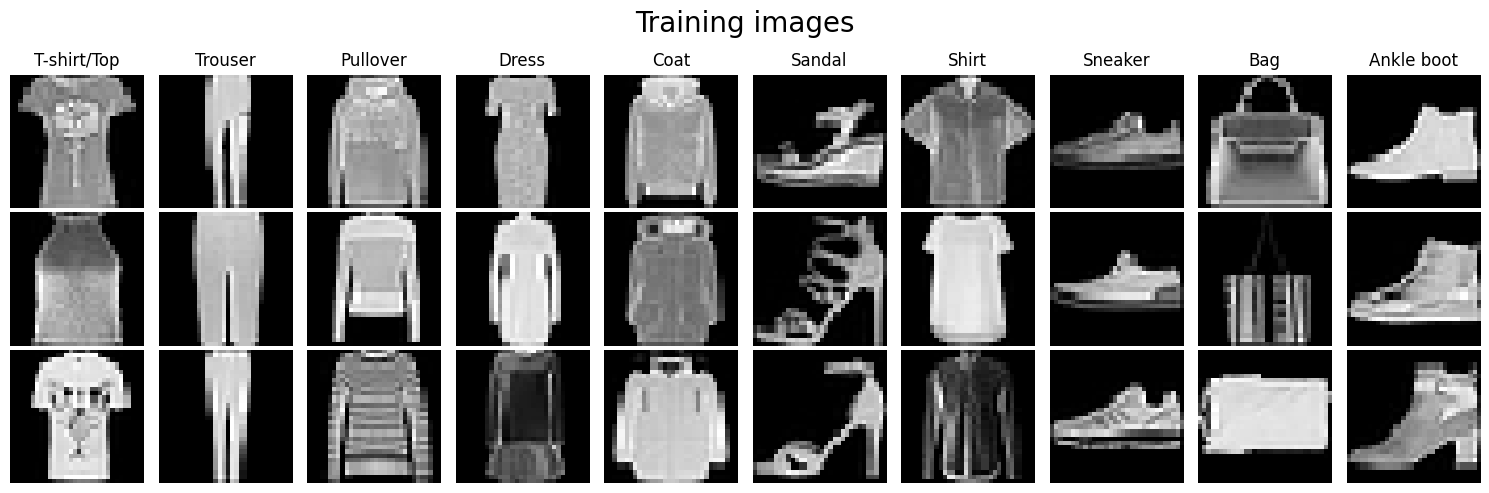

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

In [3]:
train_loader, val_loader, test_loader = dataloaders(X_train, y_train, X_val, y_val, X_test, y_test)

## Convolutional Variational Autoencoders

### Classic VAE

Number of parameters: 52621
Model loaded from Models/FashionMNIST/classic.pth


<IPython.core.display.Latex object>

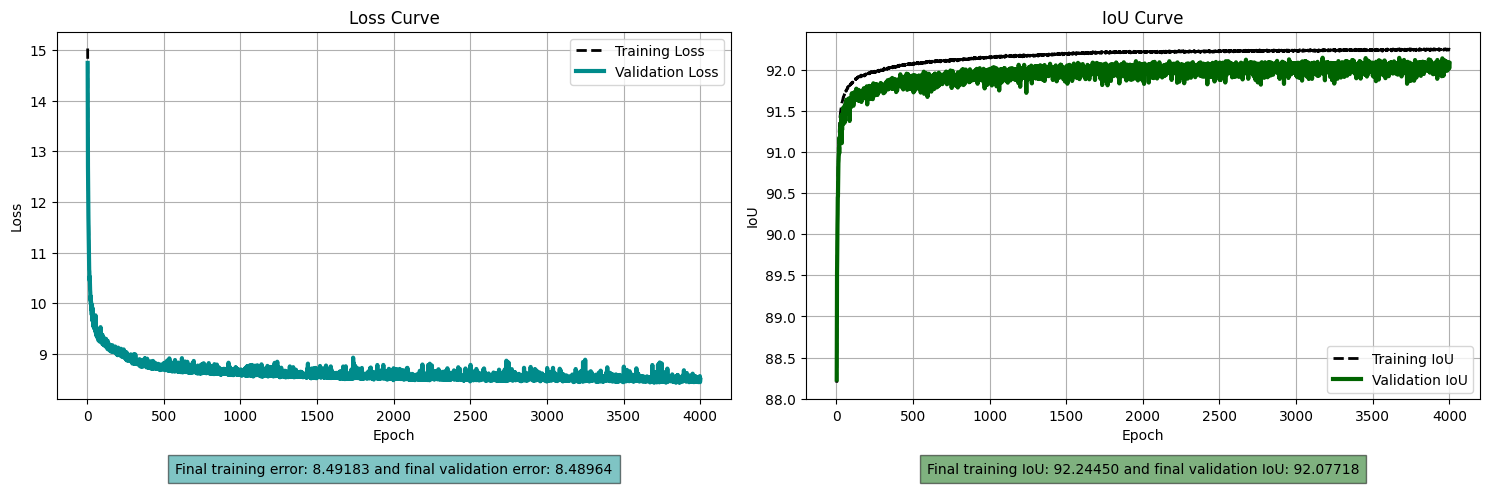

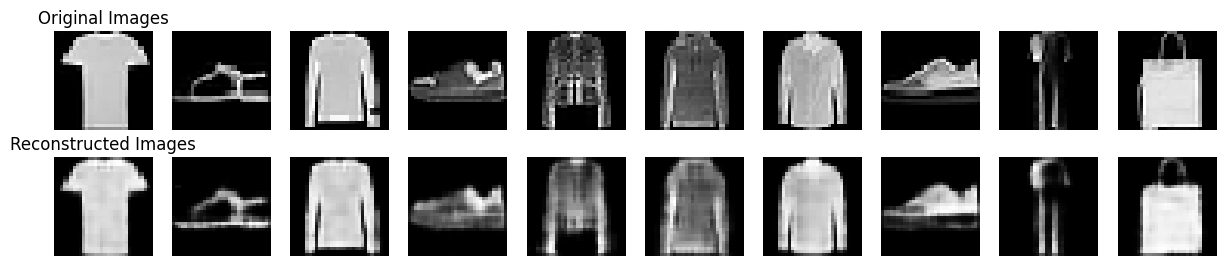

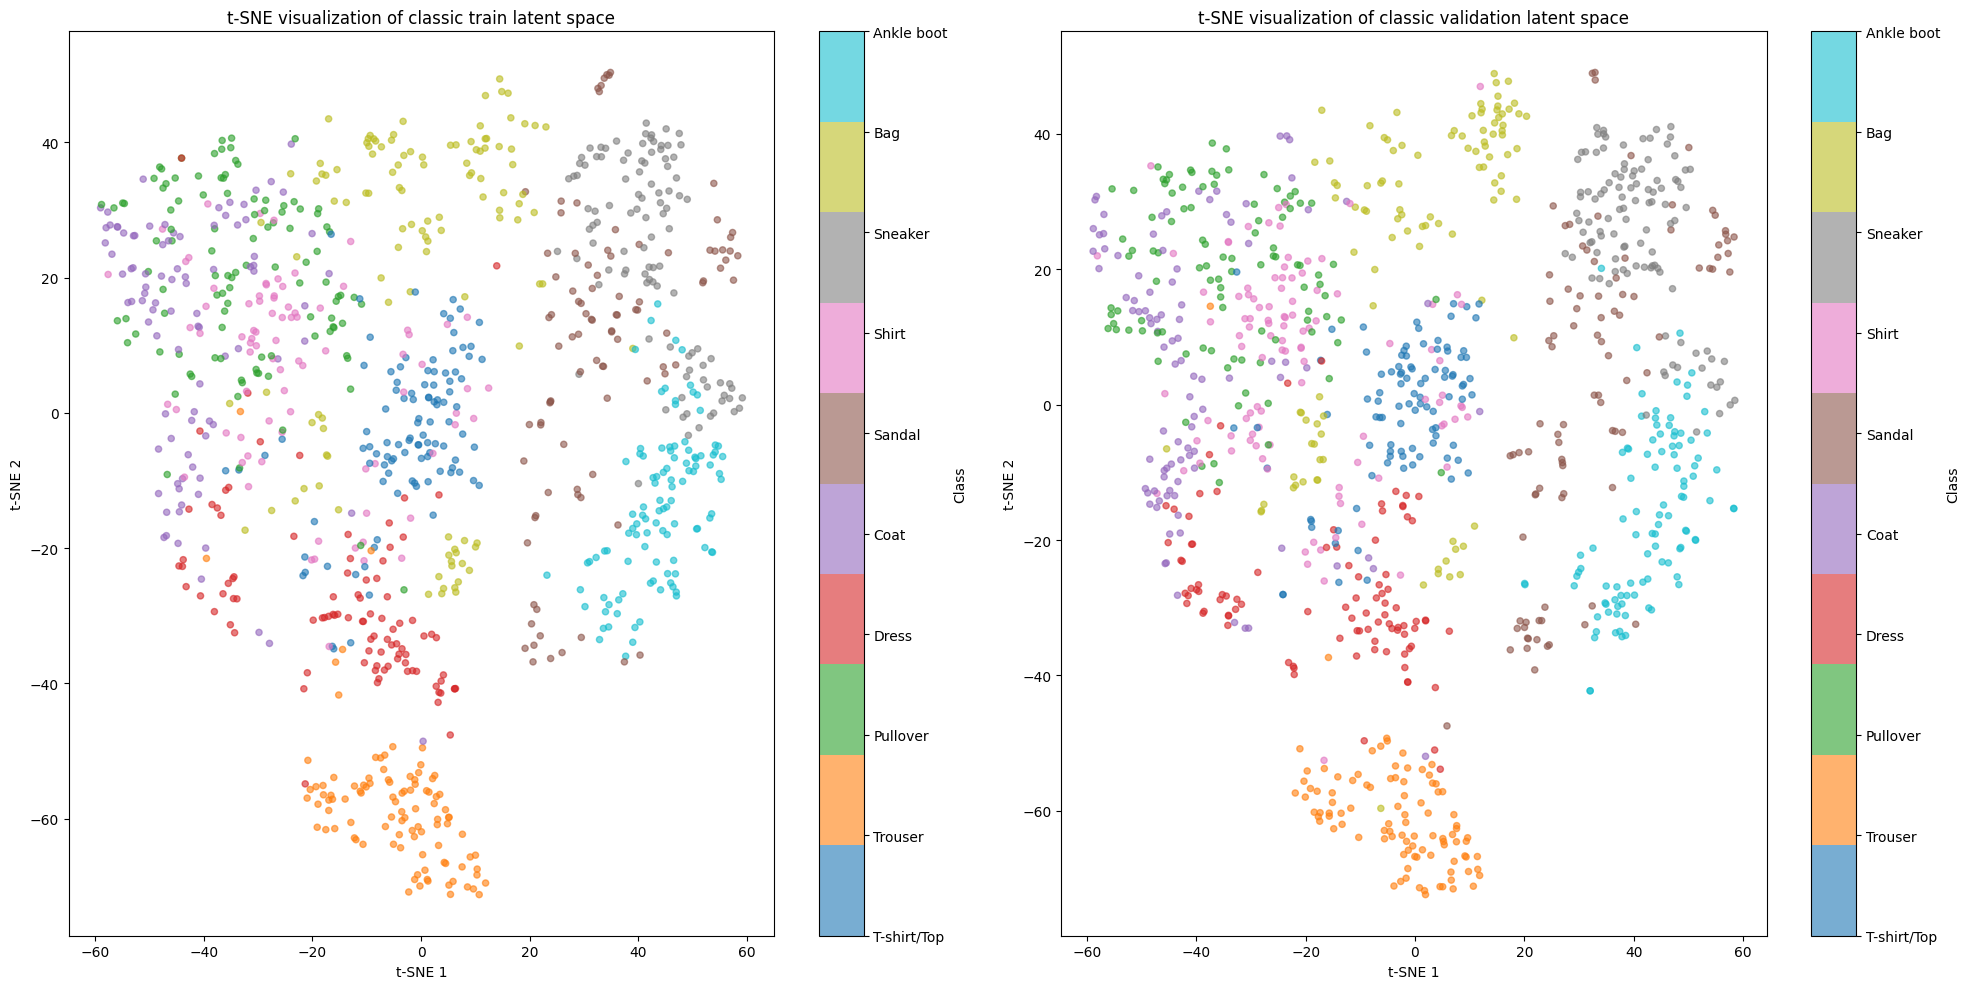

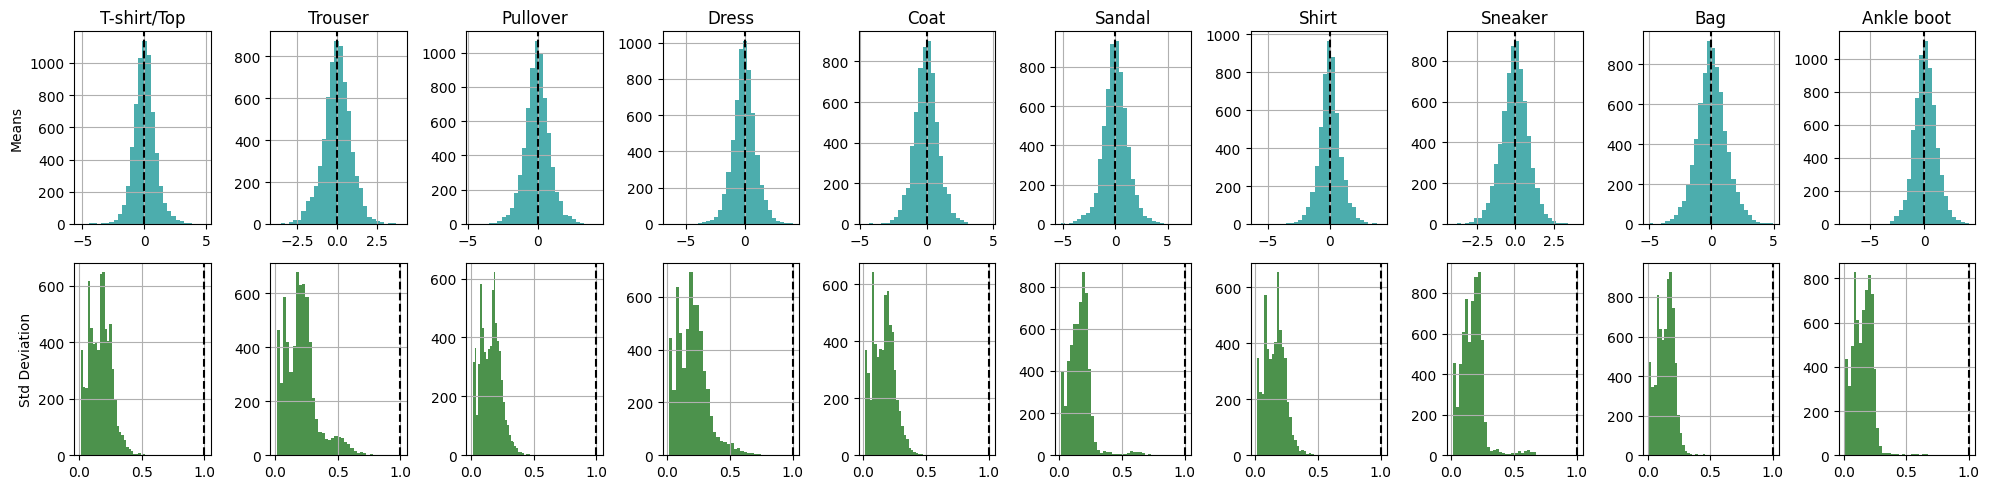

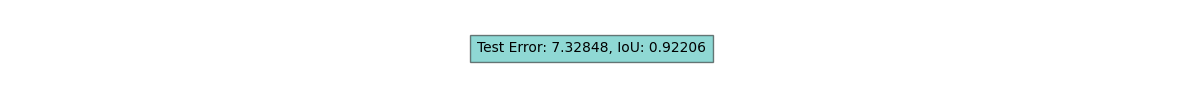

CPU times: user 1min, sys: 1.27 s, total: 1min 2s
Wall time: 49.5 s


In [4]:
%%time
set_seed()
vae1 = Classic_VAE(train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
print(f"Number of parameters: {vae1.count_parameters()}")
vae1.load_and_plot('Models/FashionMNIST/classic.pth', train_loader, val_loader) # coef=10**-2
vae1.test(test_loader, coef=0)

### VAE-NMF

Number of parameters: 51008 (-3.07%)
Model loaded from Models/FashionMNIST/nmf.pth


<IPython.core.display.Latex object>

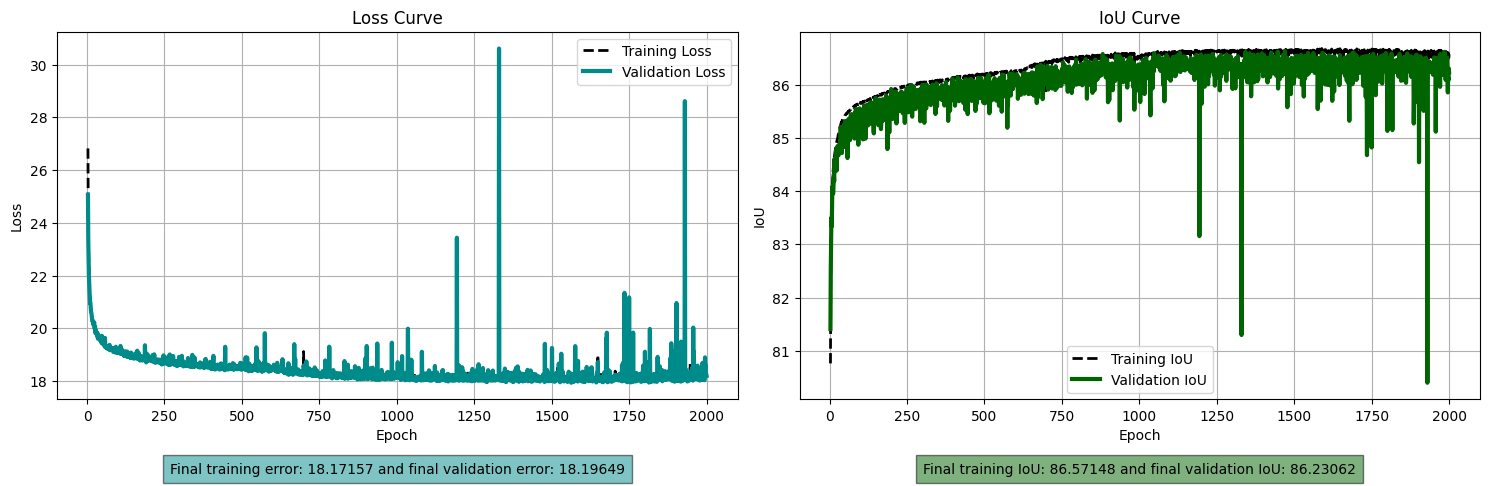

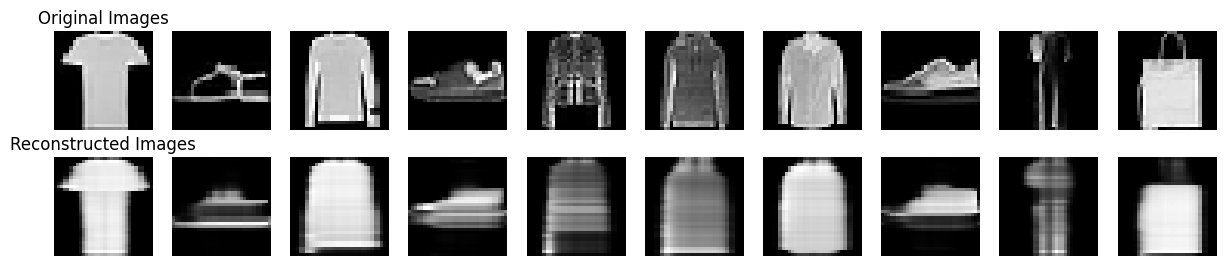

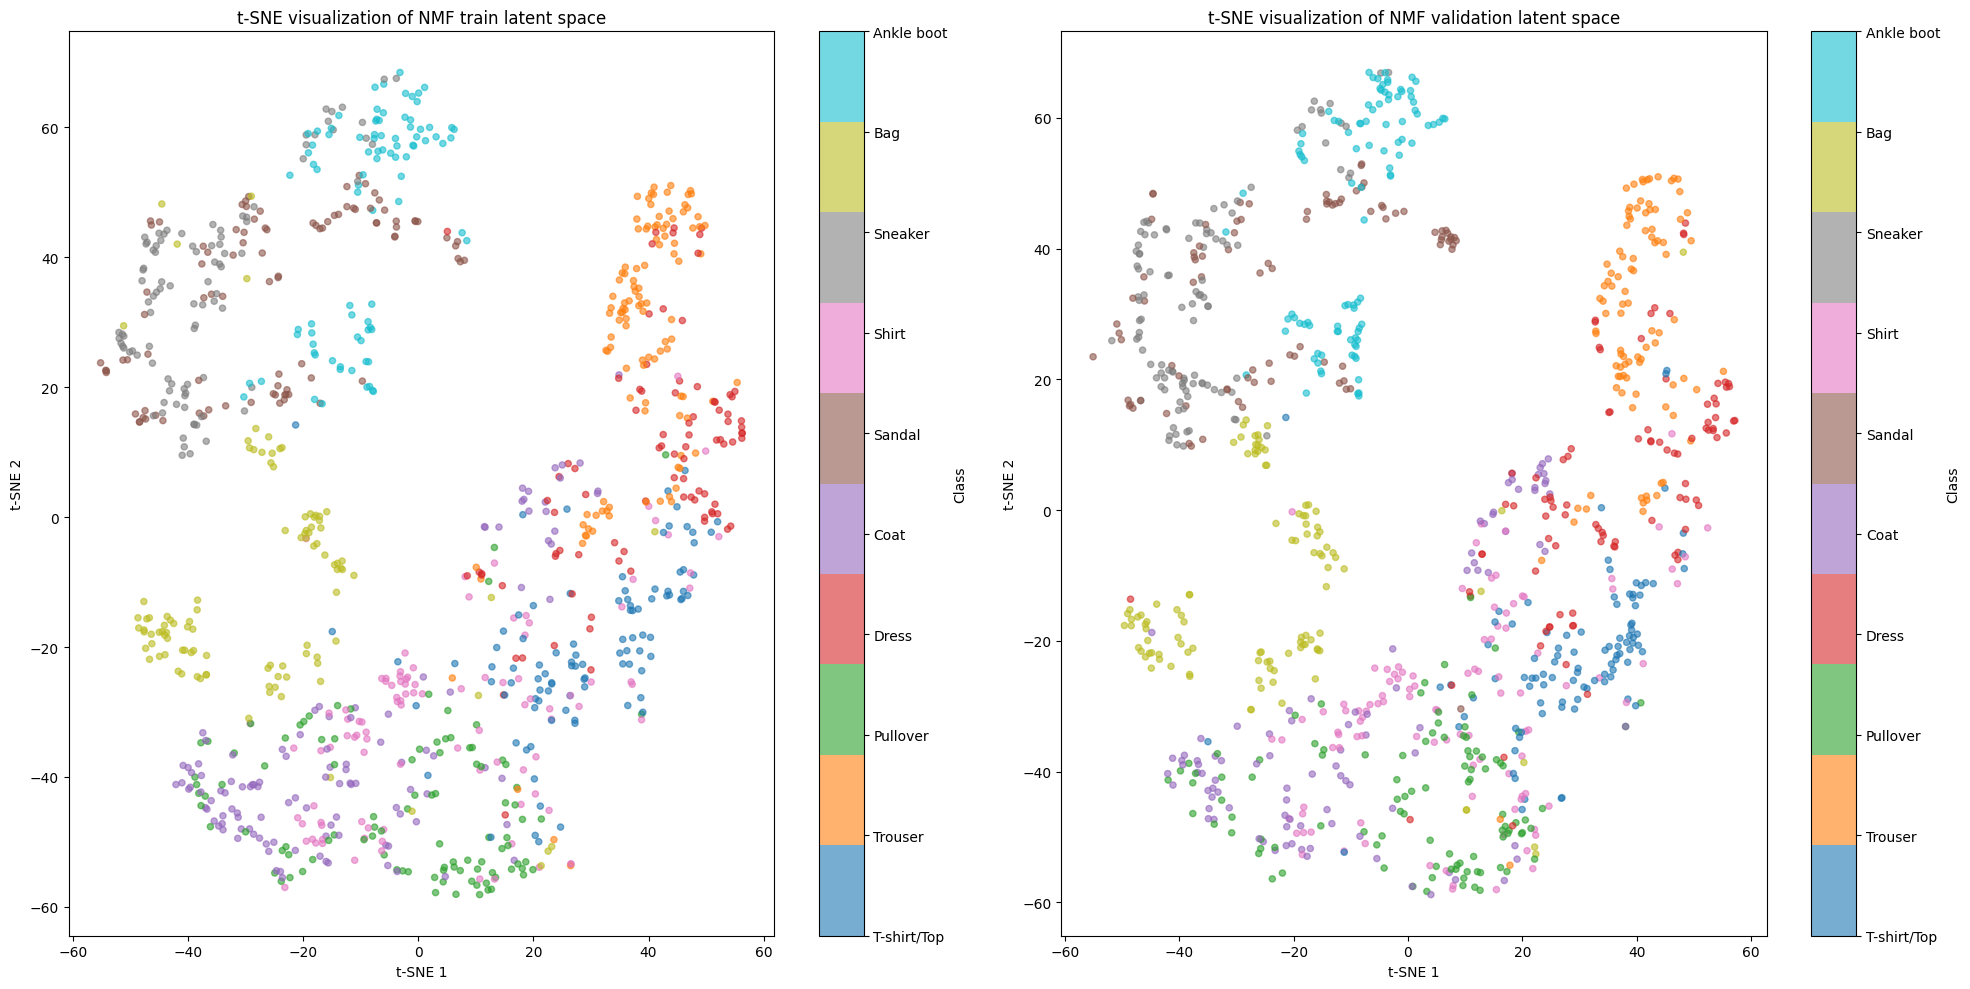

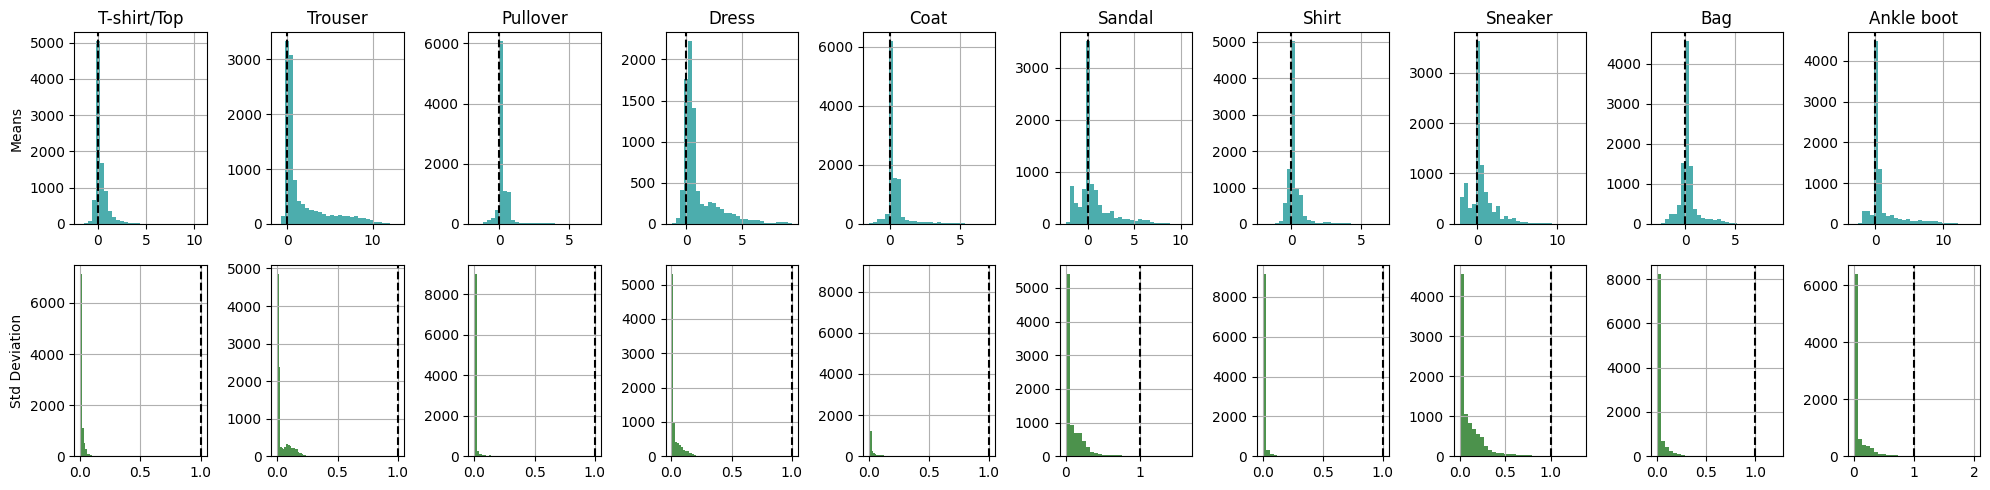

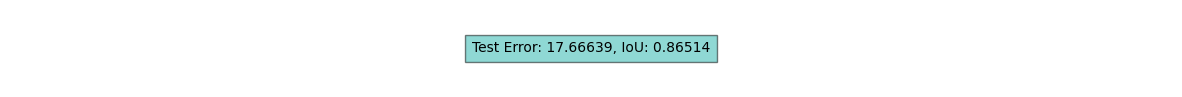

CPU times: user 56.2 s, sys: 1.8 s, total: 58 s
Wall time: 45.7 s


In [5]:
%%time
set_seed()
vae2 = VAE_NMF(rank=3, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae2)
vae2.load_and_plot('Models/FashionMNIST/nmf.pth', train_loader, val_loader) # coef=10**-3
vae2.test(test_loader, coef=0)

### VAE-NTD

Number of parameters: 43696 (-16.96%)
Model loaded from Models/FashionMNIST/ntd.pth


<IPython.core.display.Latex object>

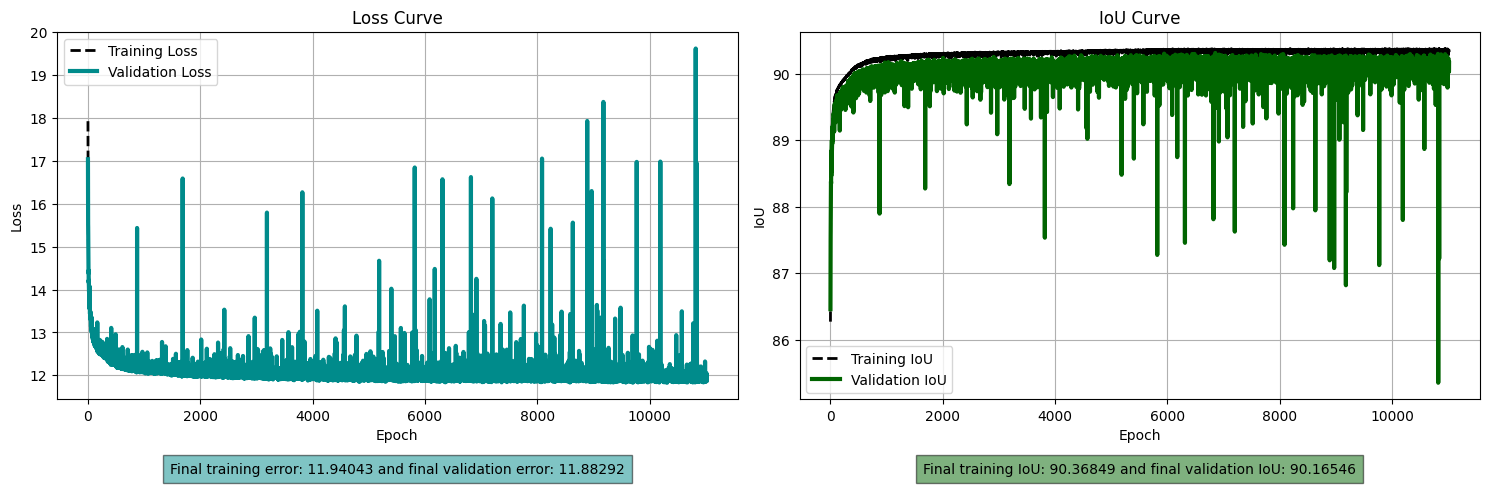

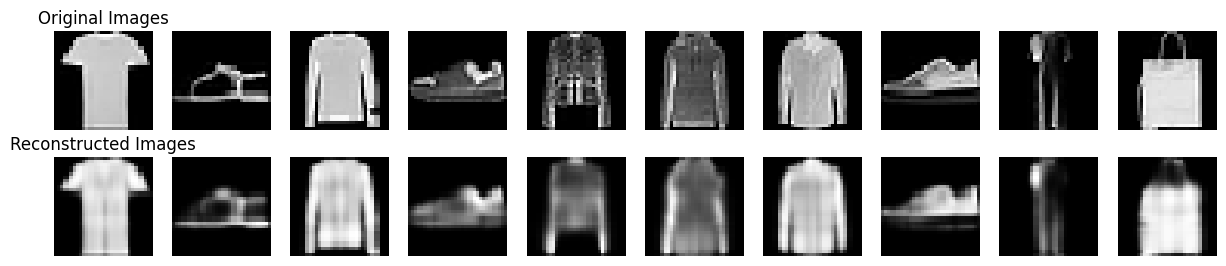

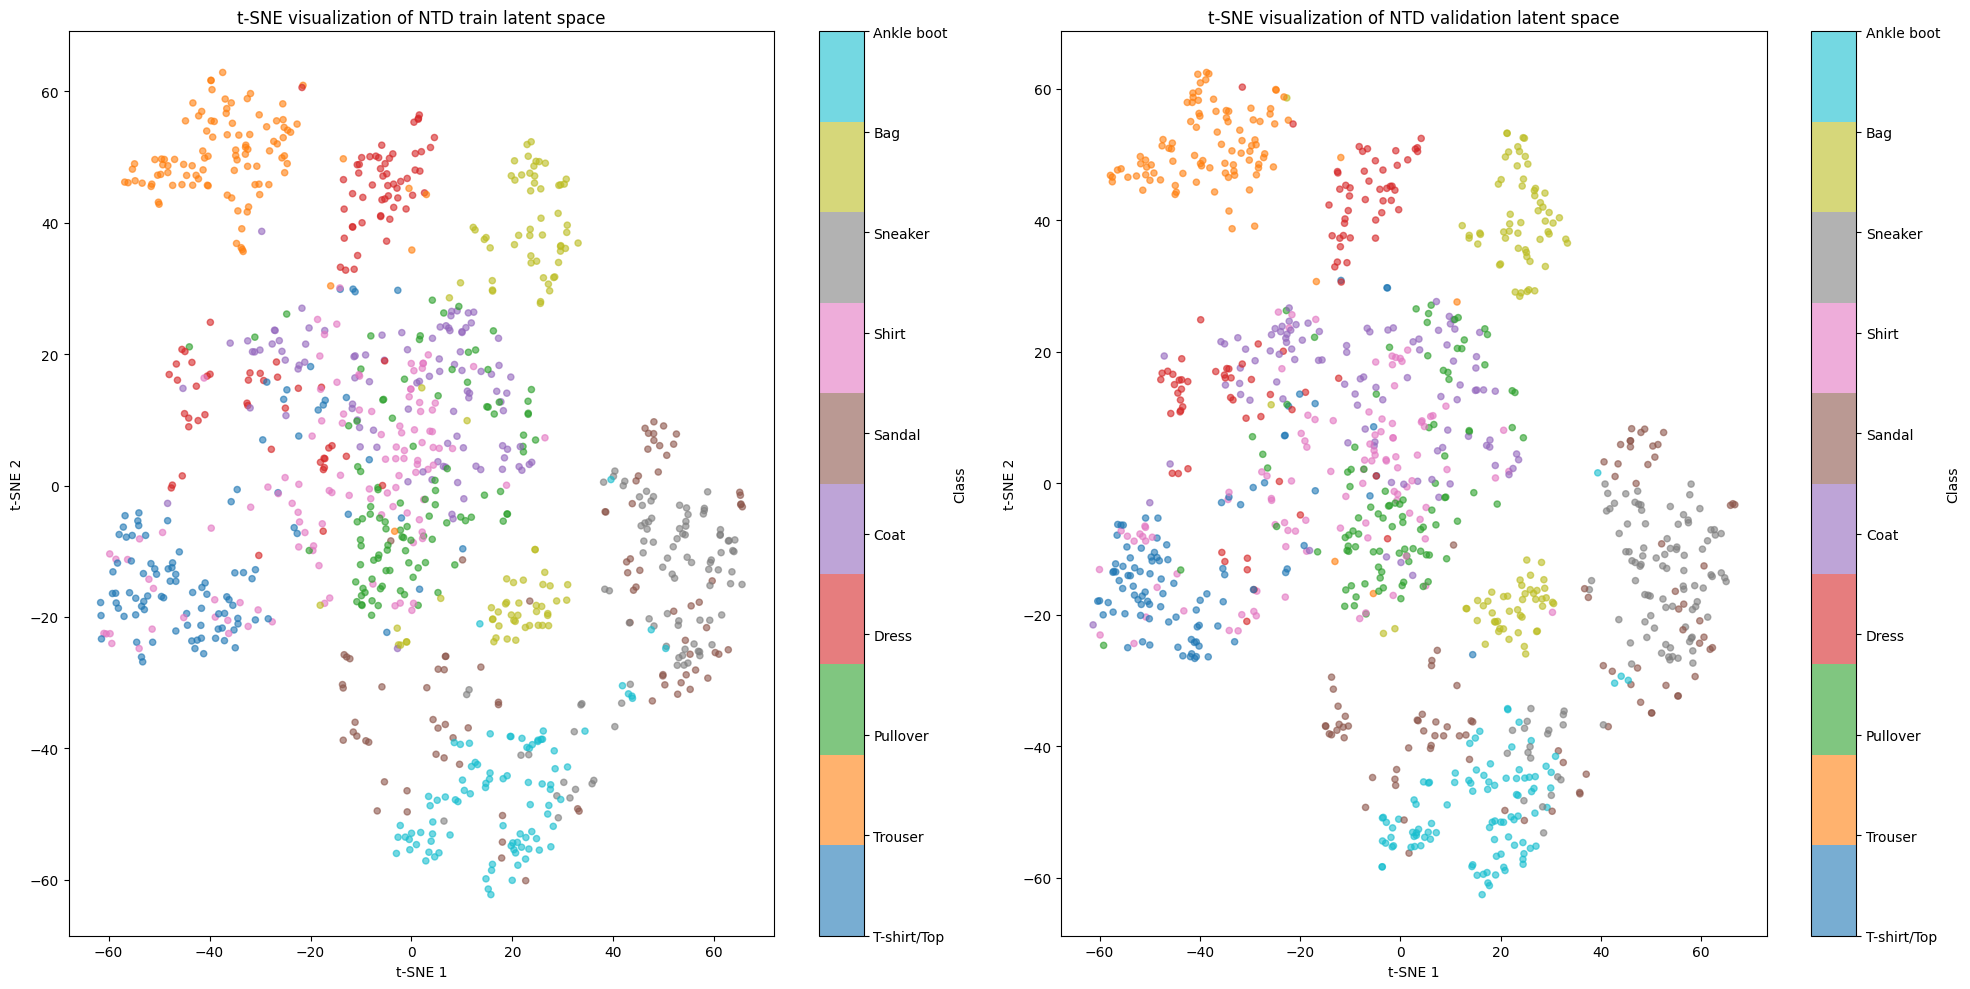

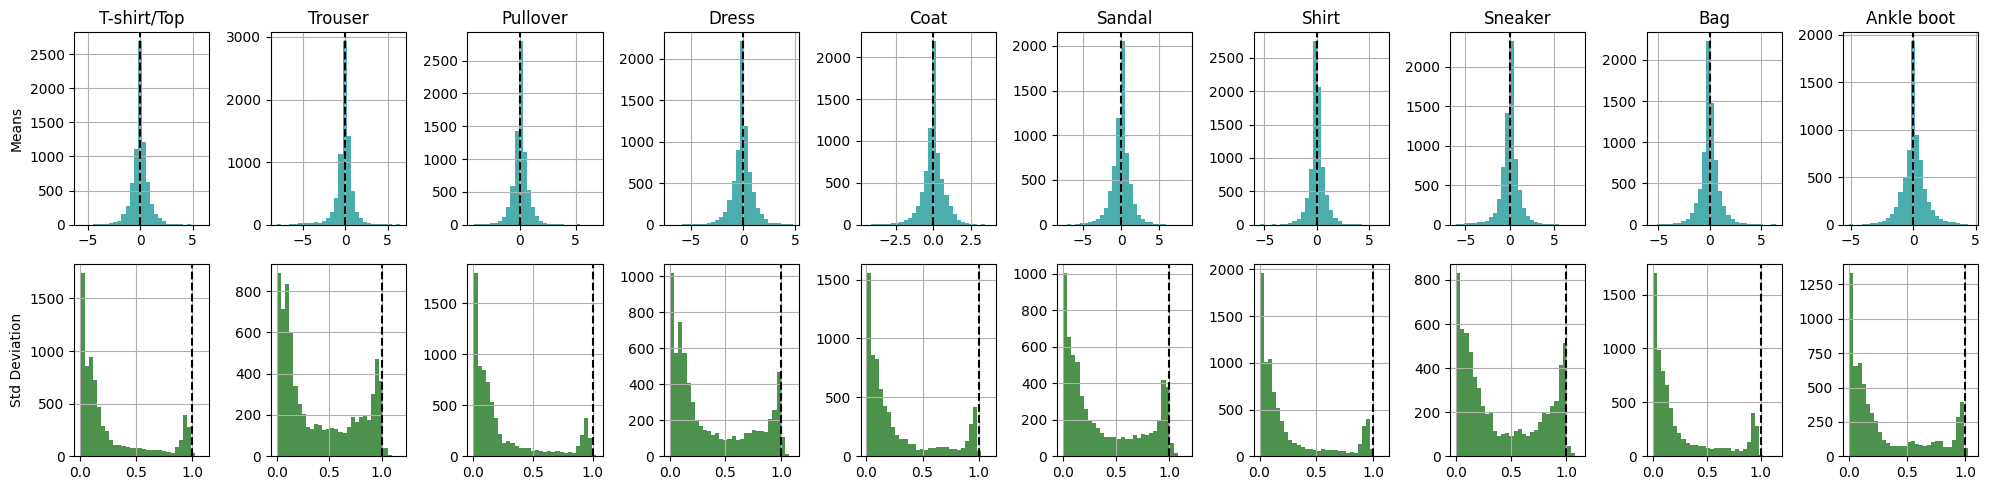

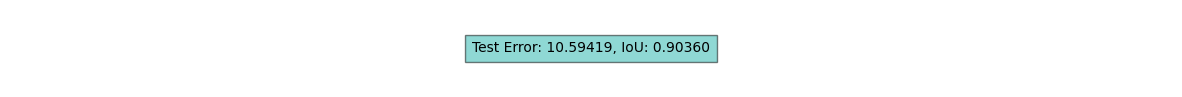

CPU times: user 1min, sys: 1.19 s, total: 1min 1s
Wall time: 49.8 s


In [6]:
%%time
set_seed()
vae3 = VAE_NTD(rank=[8, 8, 72], train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae3)
vae3.load_and_plot('Models/FashionMNIST/ntd.pth', train_loader, val_loader) # coef=10**-2
vae3.test(test_loader, coef=0)

### VAE-CPD-NN

Number of parameters: 43184 (-17.93%)
Model loaded from Models/FashionMNIST/cpd_nn.pth


<IPython.core.display.Latex object>

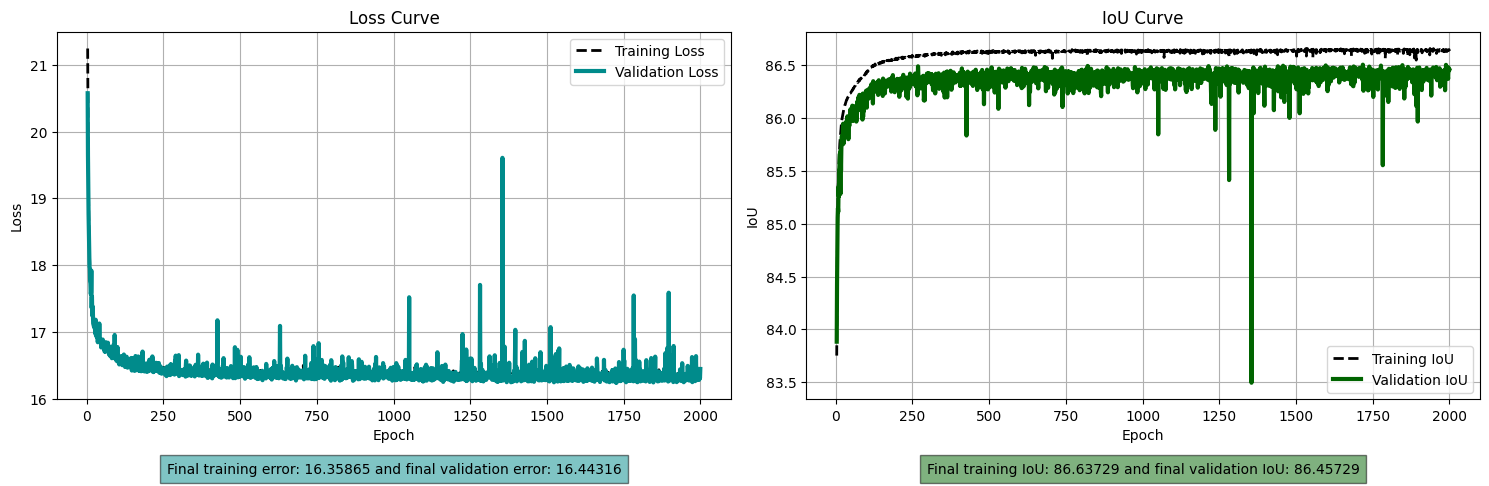

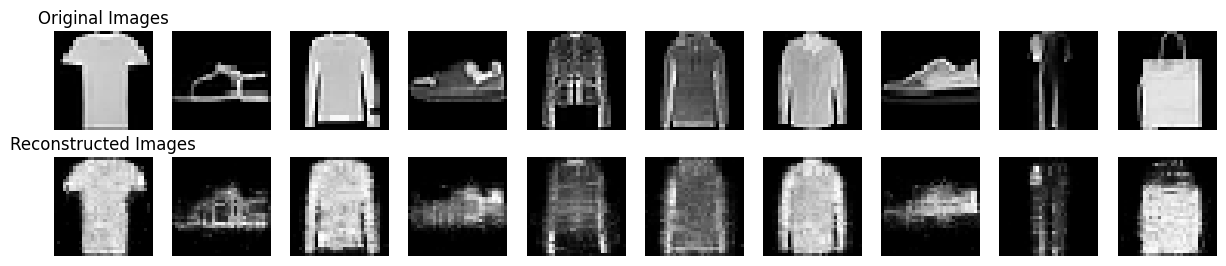

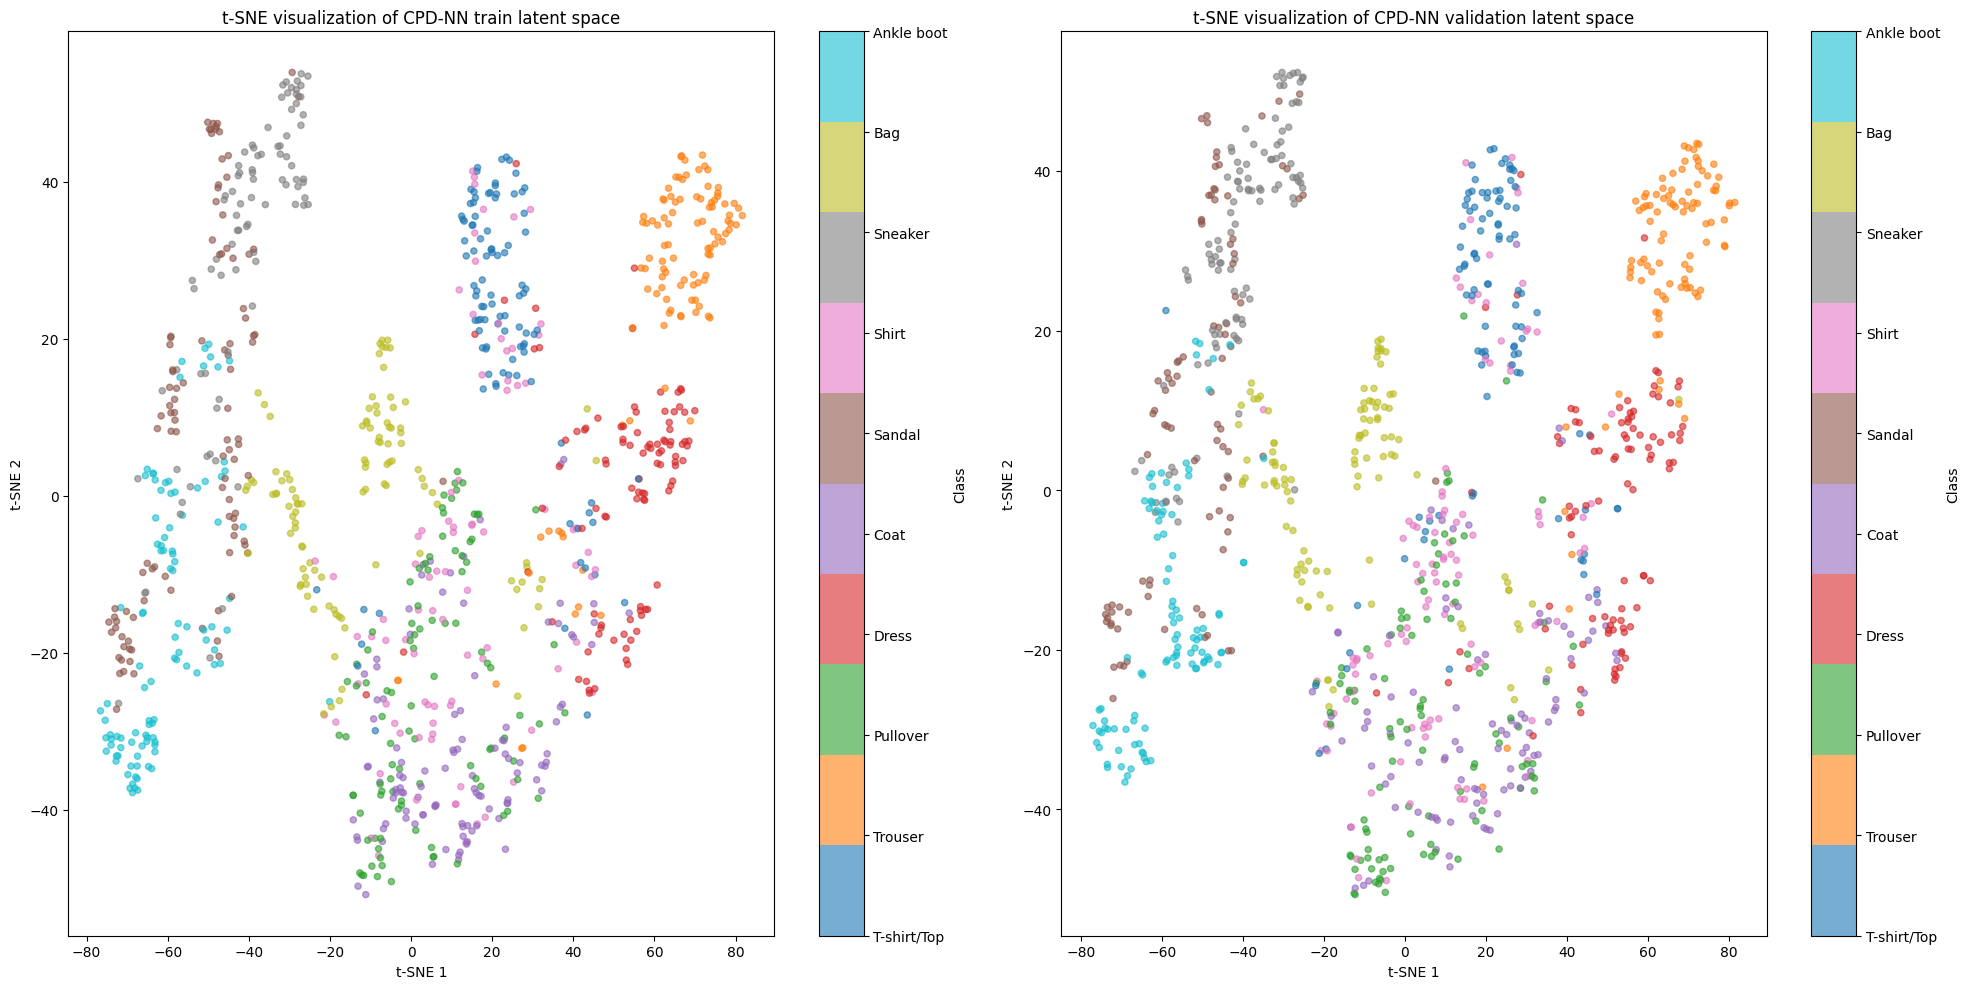

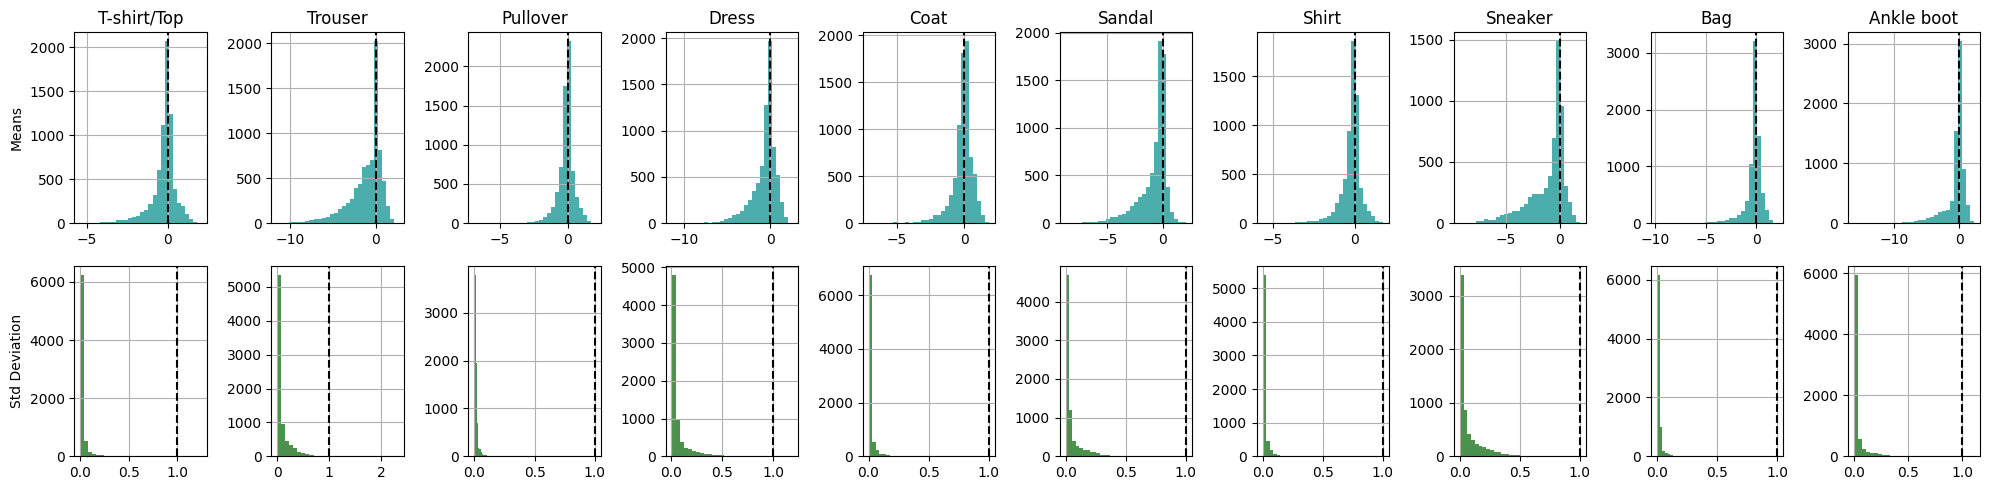

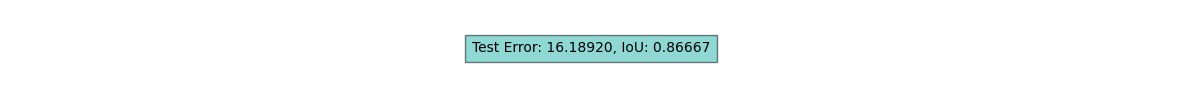

CPU times: user 60 s, sys: 1.38 s, total: 1min 1s
Wall time: 48.6 s


In [7]:
%%time
set_seed()
vae4 = VAE_CPD_NN(rank=72, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[])
reduction(vae1, vae4)
vae4.load_and_plot('Models/FashionMNIST/cpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4.test(test_loader, coef=0)

### mVAE-CPD-NN

Number of parameters: 50700 (-3.65%)
Model loaded from Models/FashionMNIST/mcpd_nn.pth


<IPython.core.display.Latex object>

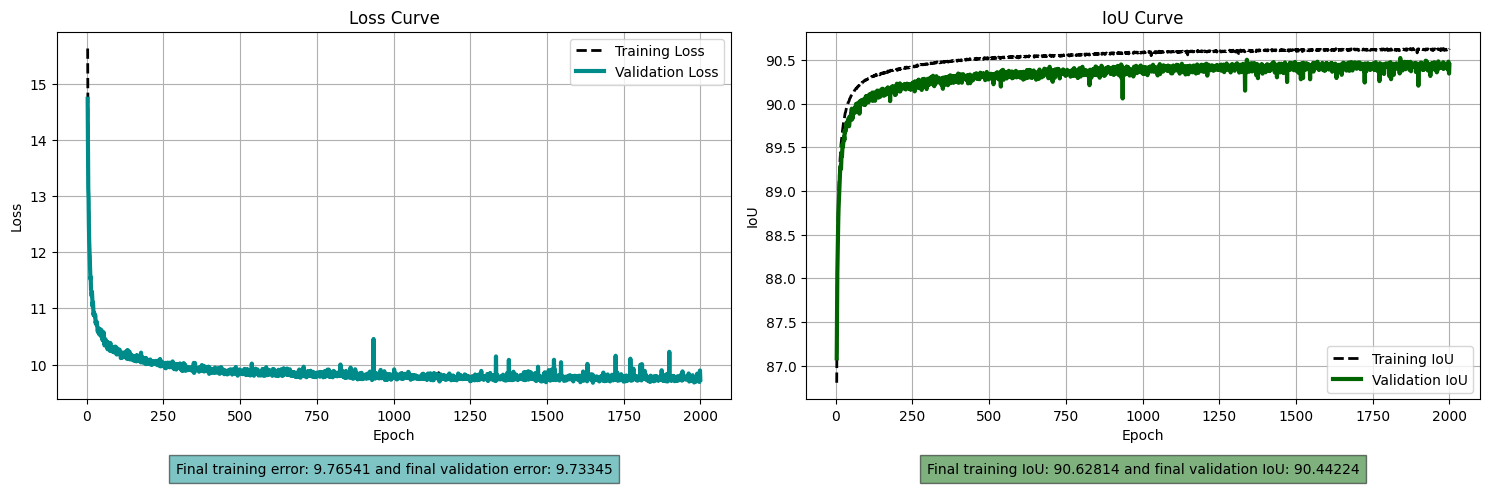

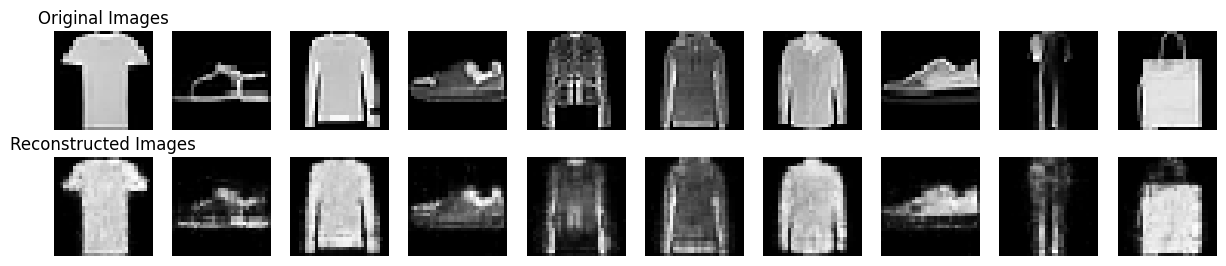

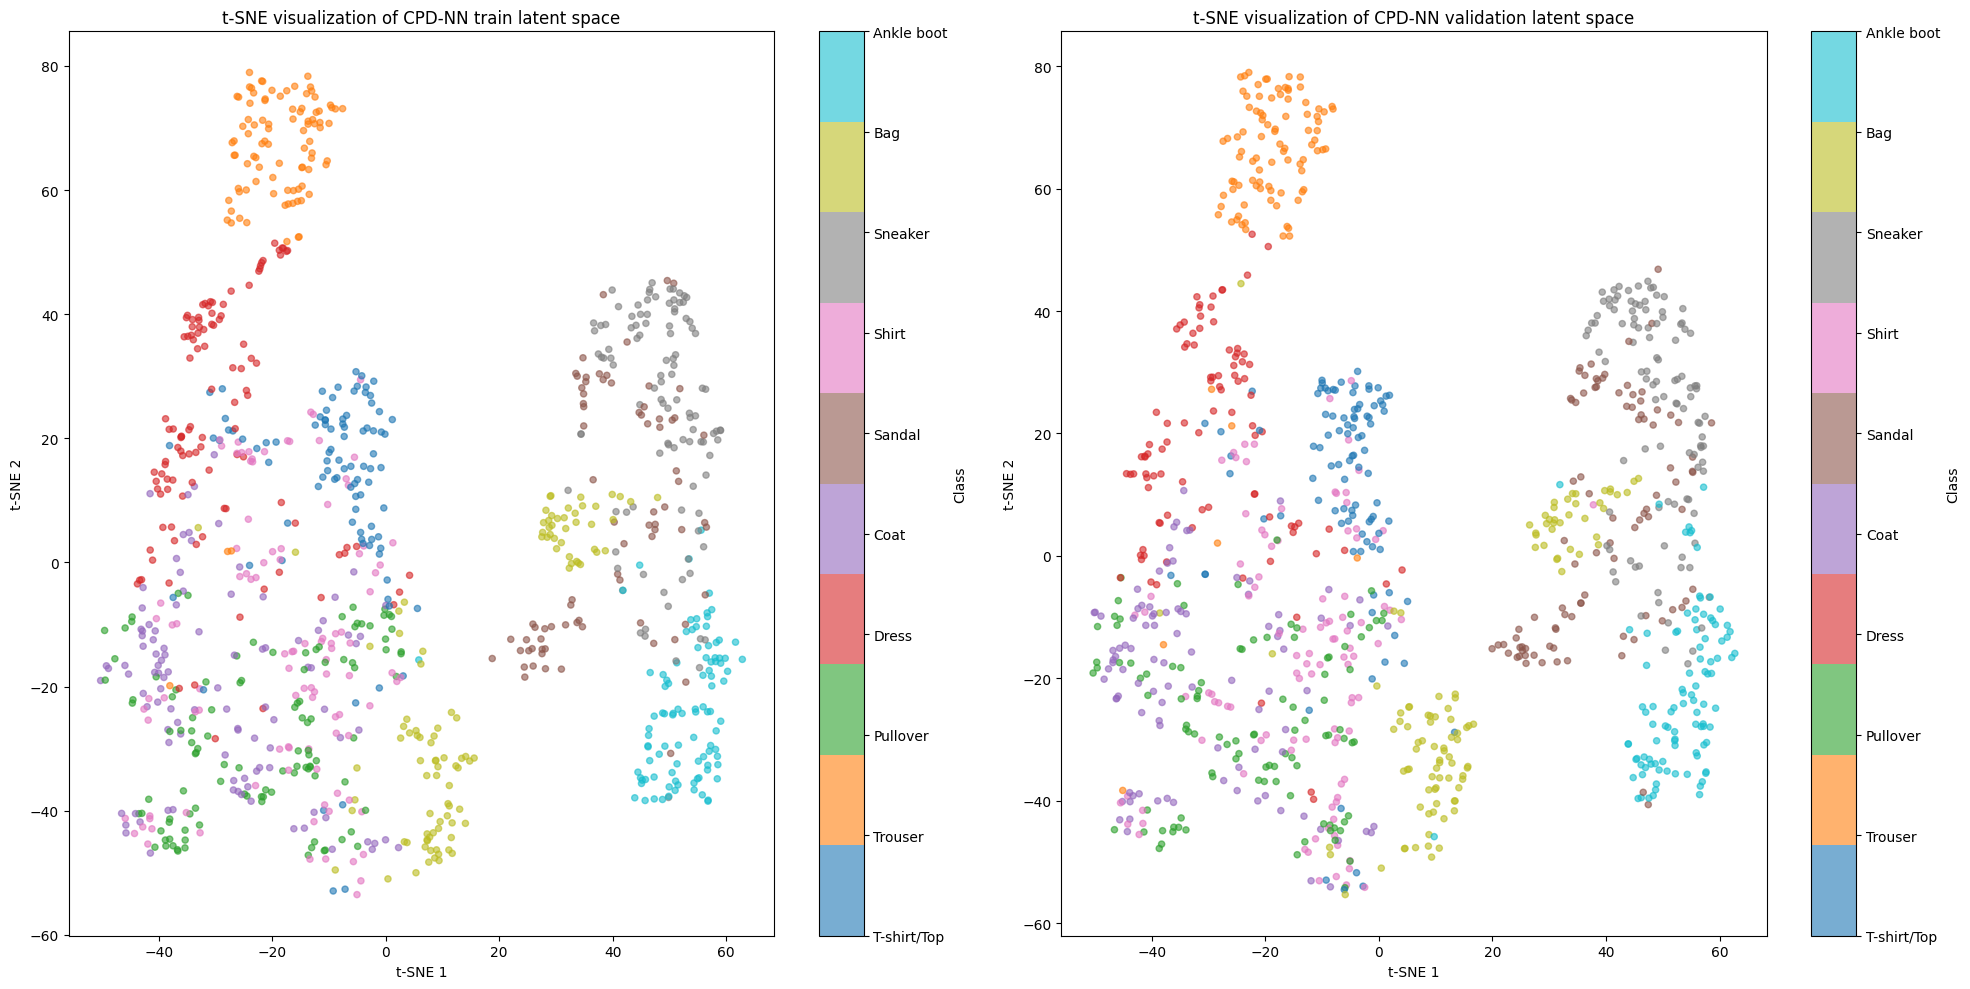

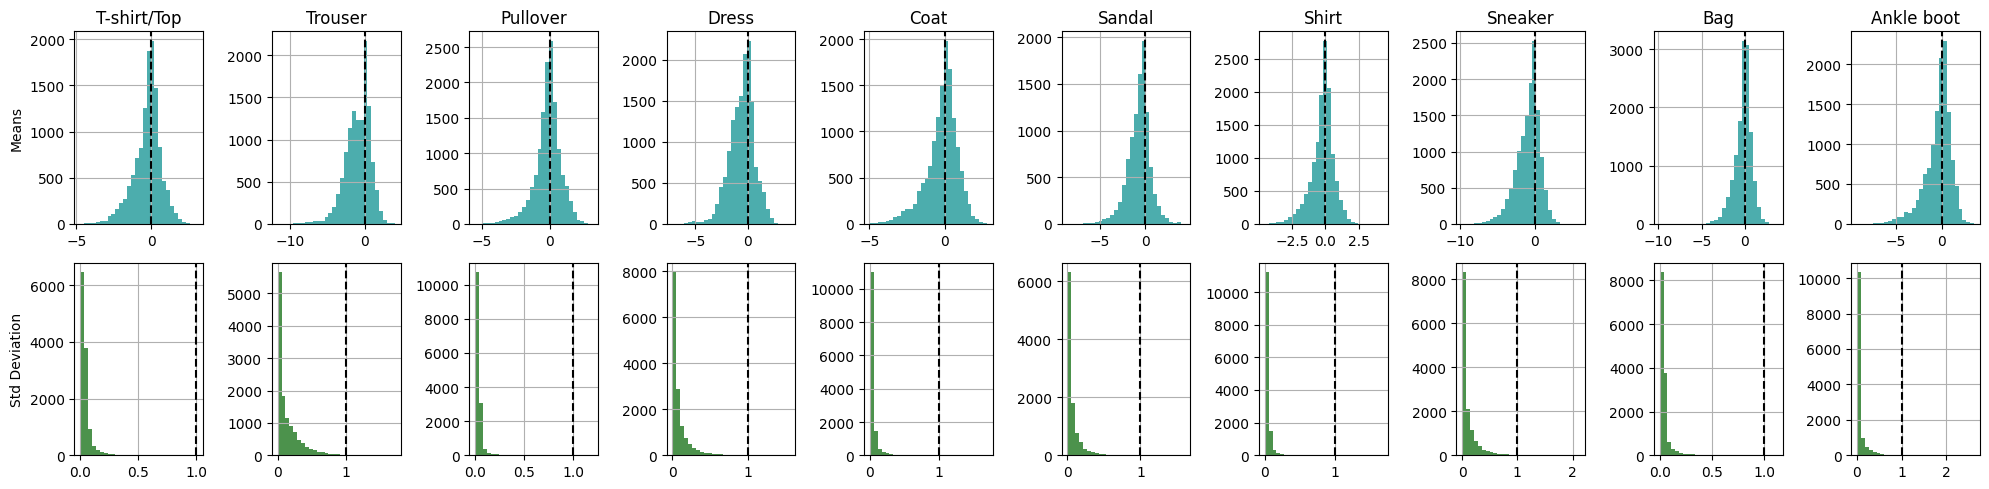

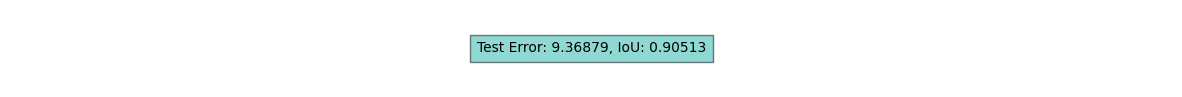

CPU times: user 57.9 s, sys: 1.54 s, total: 59.5 s
Wall time: 48.1 s


In [8]:
%%time
set_seed()
vae4m = VAE_CPD_NN(rank=130, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Matrices')
reduction(vae1, vae4m)
vae4m.load_and_plot('Models/FashionMNIST/mcpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4m.test(test_loader, coef=0)

### sVAE-CPD-NN

Number of parameters: 51620 (-1.90%)
Model loaded from Models/FashionMNIST/scpd_nn.pth


<IPython.core.display.Latex object>

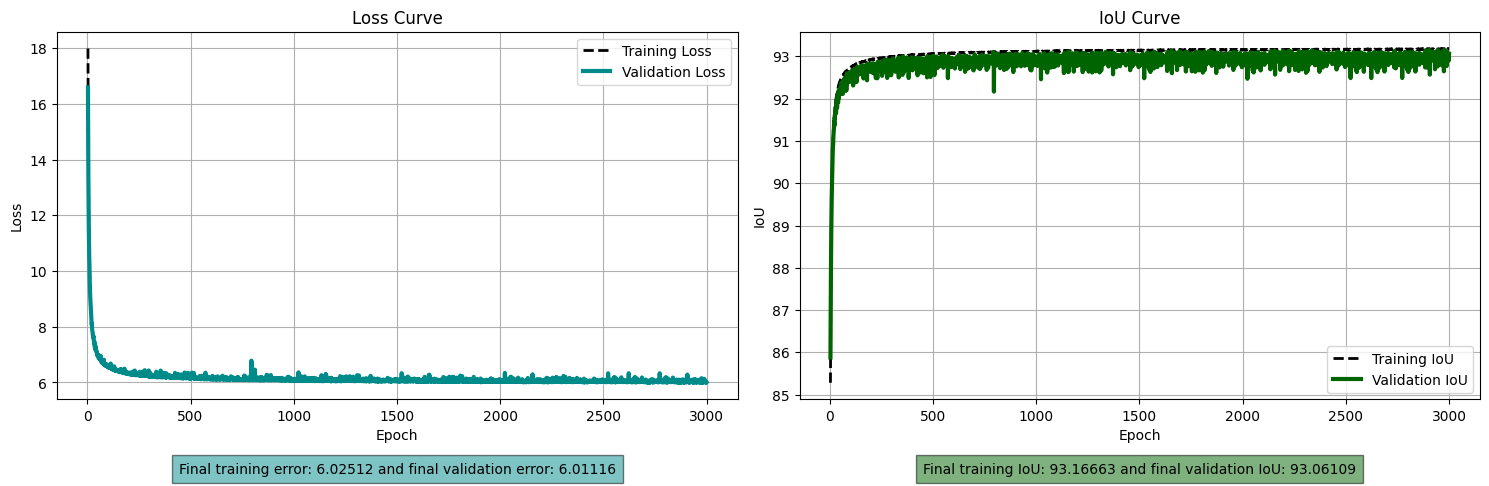

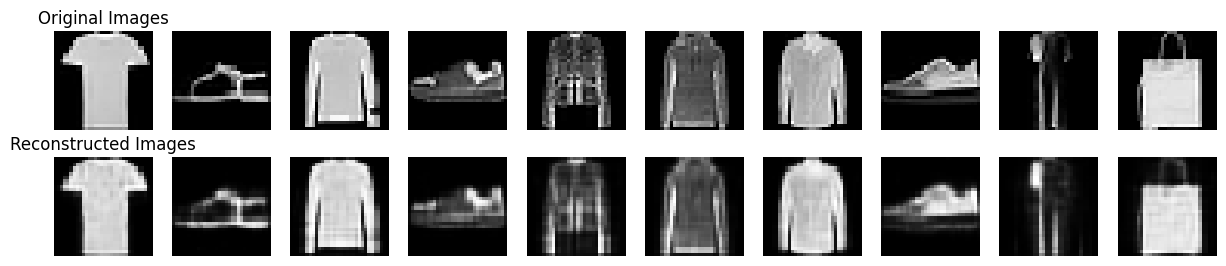

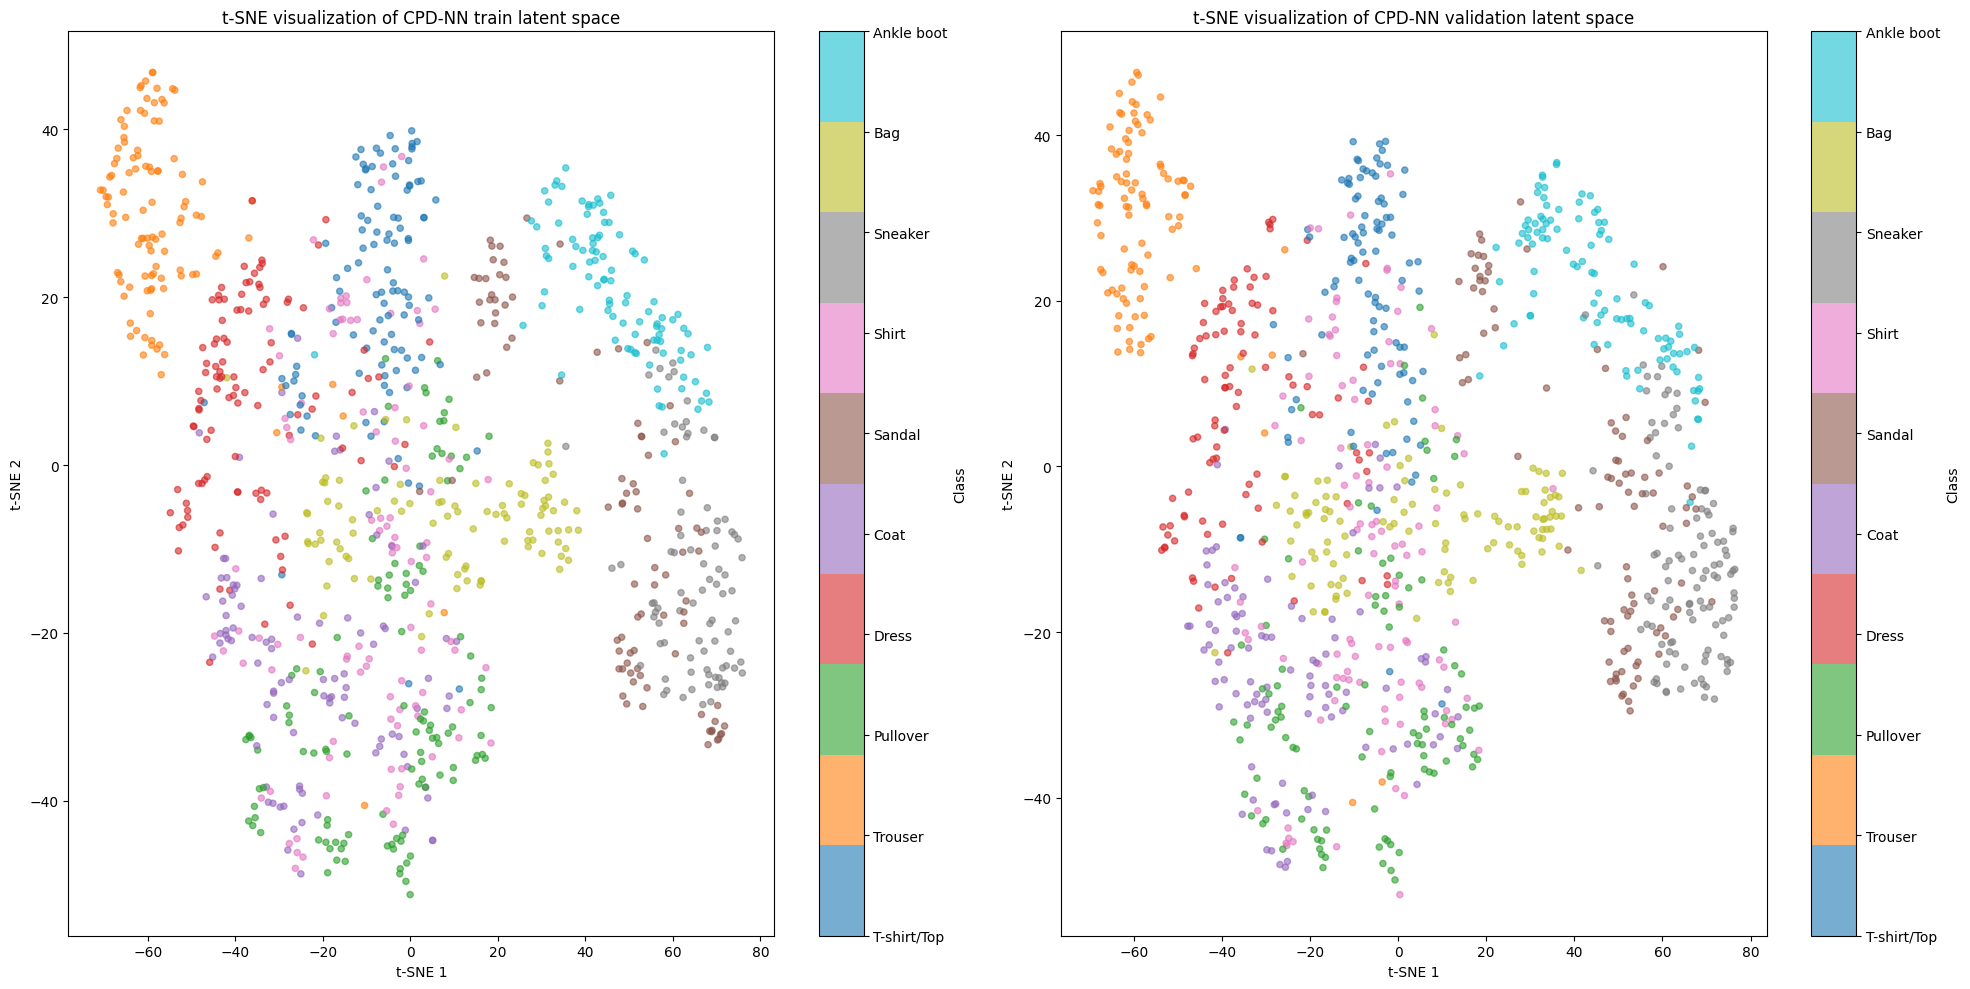

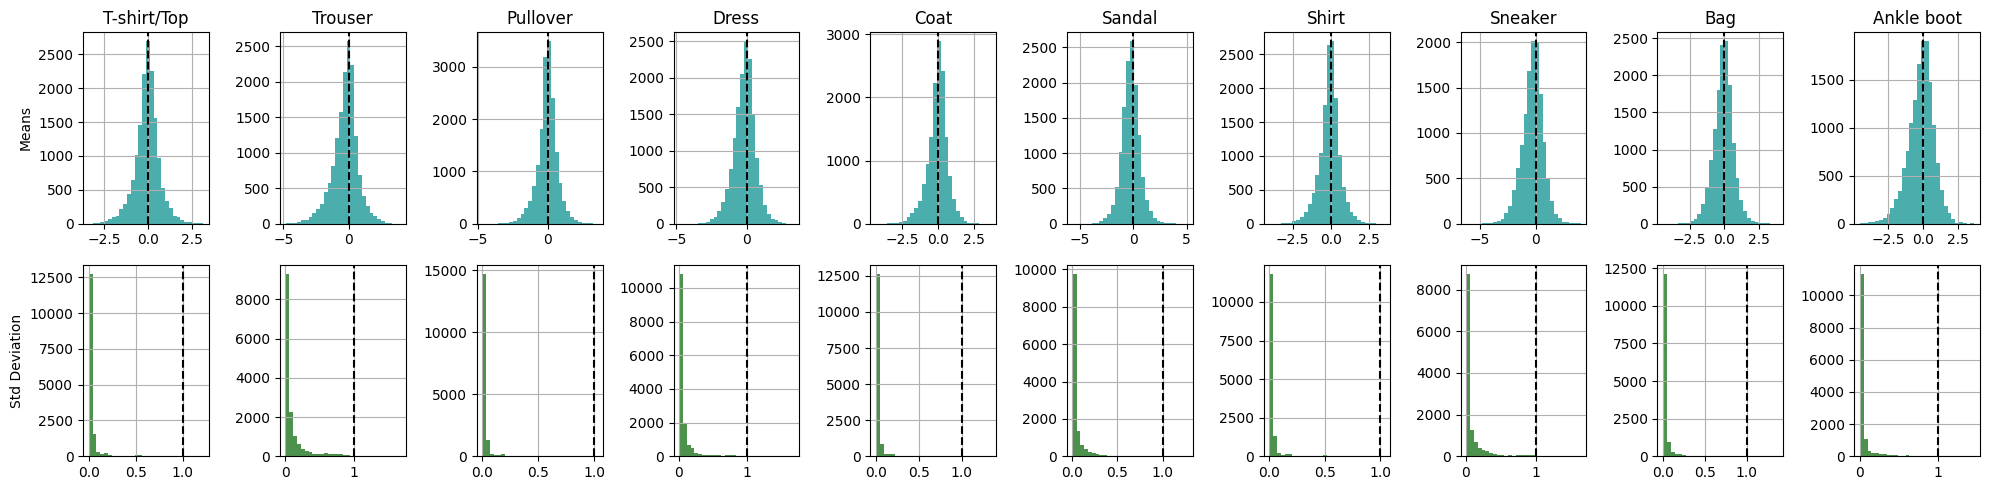

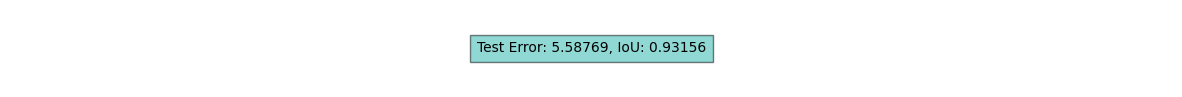

CPU times: user 1min 4s, sys: 1.58 s, total: 1min 5s
Wall time: 49.9 s


In [9]:
%%time
set_seed()
vae4s = VAE_CPD_NN(rank=145, train_losses=[], val_losses=[], train_IoU=[], val_IoU=[], encod='Symmetric')
reduction(vae1, vae4s)
vae4s.load_and_plot('Models/FashionMNIST/scpd_nn.pth', train_loader, val_loader) # coef=10**-3
vae4s.test(test_loader, coef=0)

## Classification

### Classic VAE

Model loaded from Models/FashionMNIST/classic_cl.pth


<IPython.core.display.Latex object>

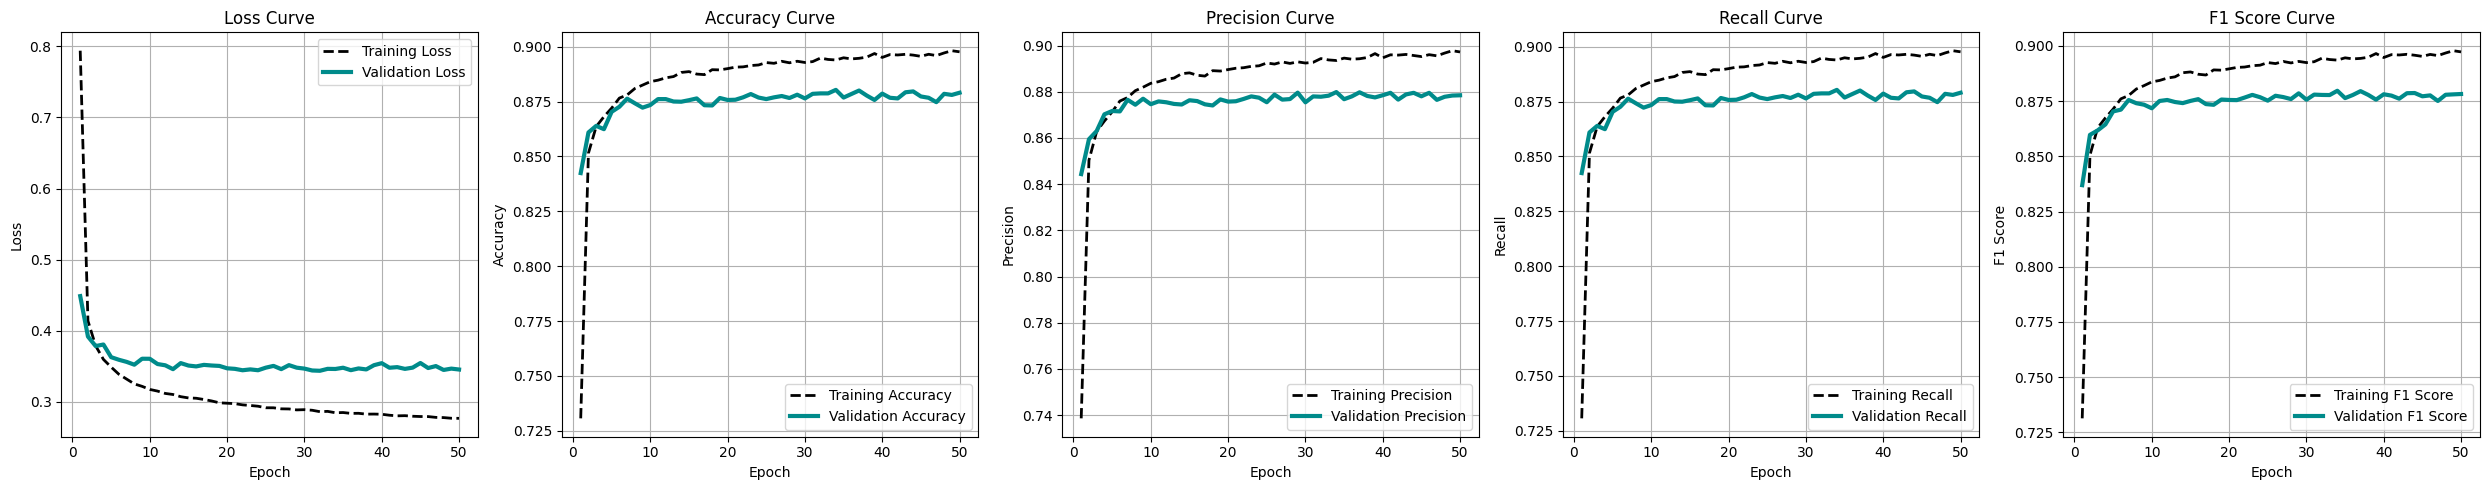

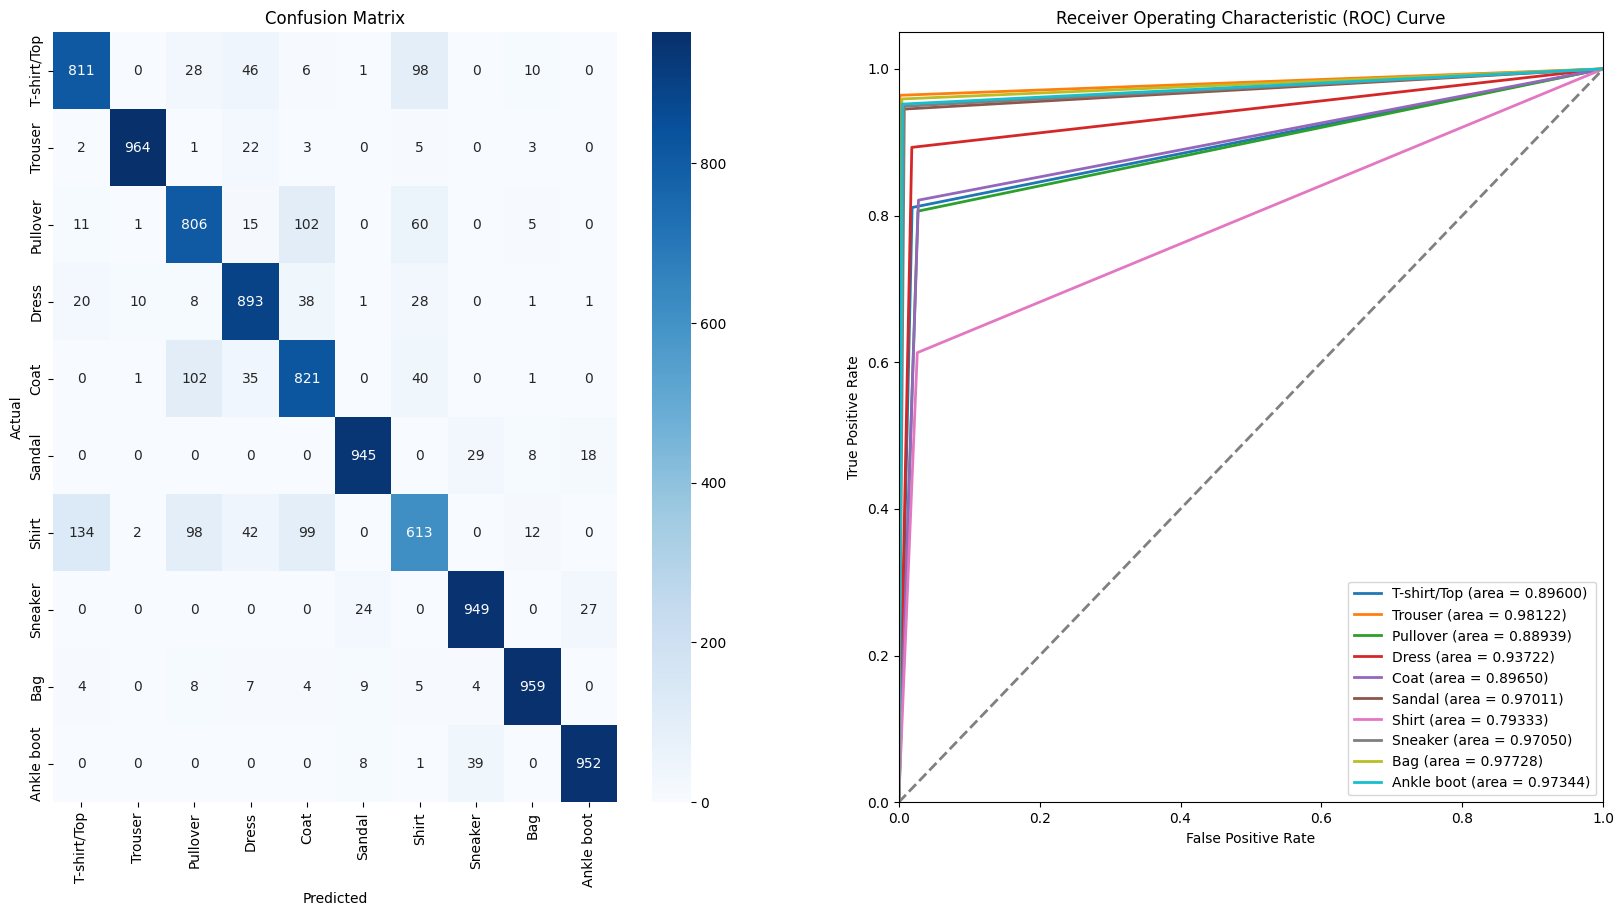

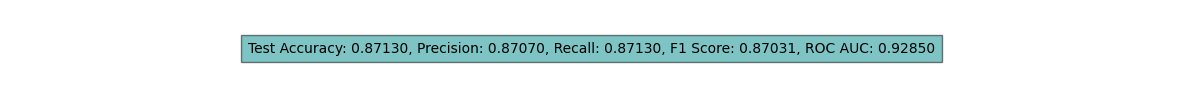

CPU times: user 5.24 s, sys: 364 ms, total: 5.61 s
Wall time: 4.02 s


In [10]:
%%time
set_seed()
cl1 = Classifier(vae1, dataset='Fashion MNIST')
cl1.load_and_plot('Models/FashionMNIST/classic_cl.pth', test_loader)

### VAE-NMF

Model loaded from Models/FashionMNIST/nmf_cl.pth


<IPython.core.display.Latex object>

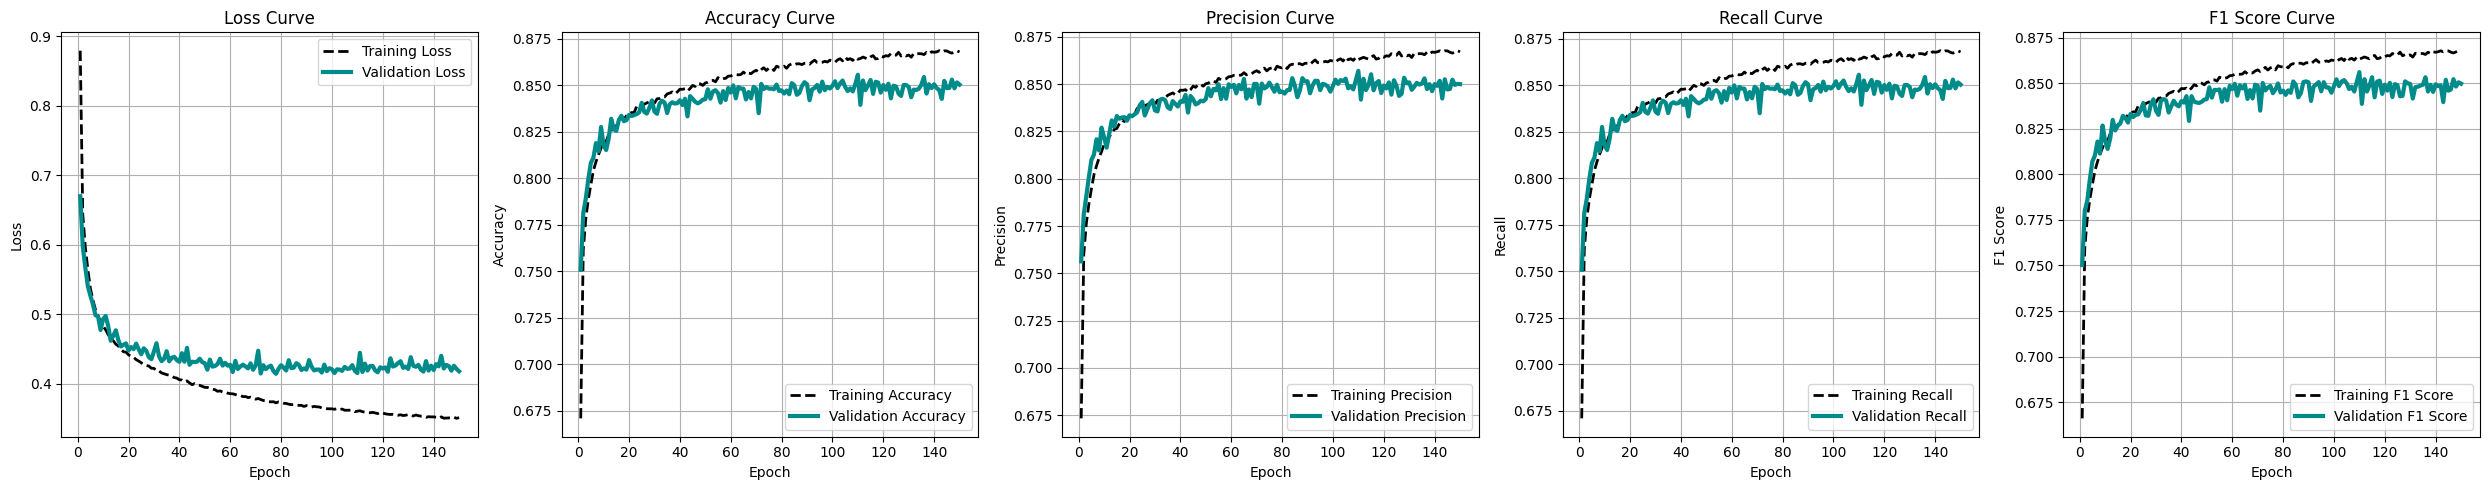

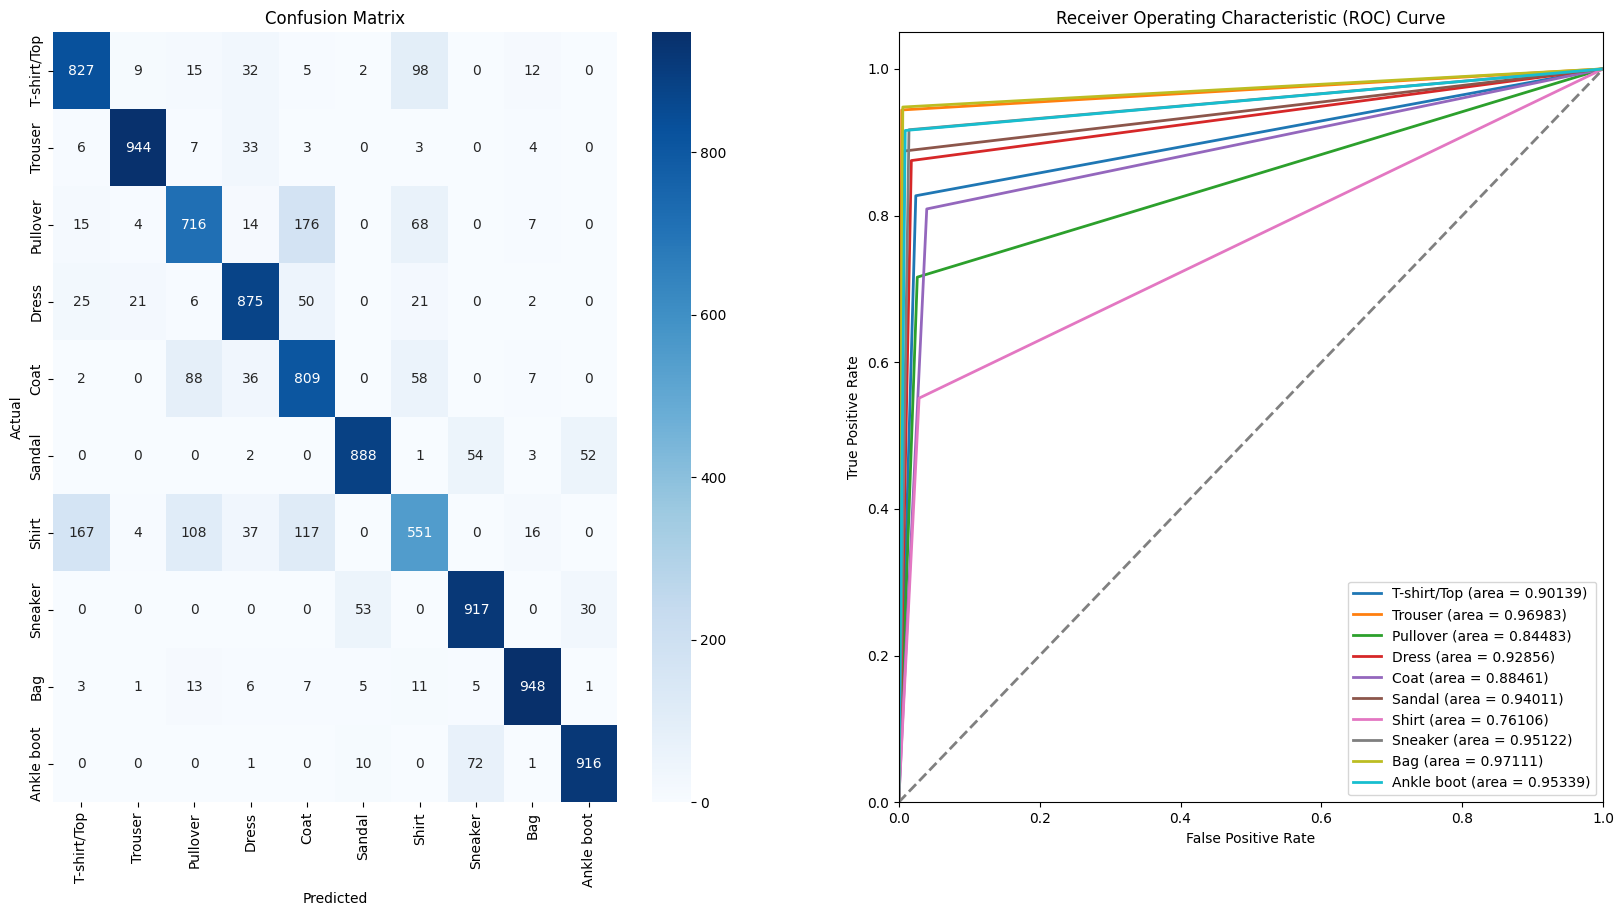

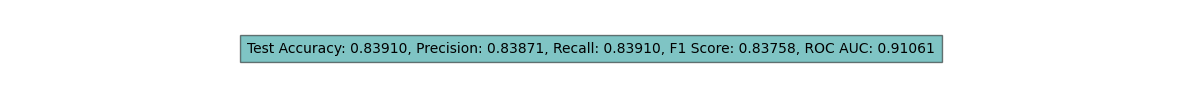

CPU times: user 4.23 s, sys: 356 ms, total: 4.59 s
Wall time: 3.34 s


In [11]:
%%time
set_seed()
cl2 = Classifier(vae2, dataset='Fashion MNIST', input_dim=32*3)
cl2.load_and_plot('Models/FashionMNIST/nmf_cl.pth', test_loader)

### VAE-NTD

Model loaded from Models/FashionMNIST/ntd_cl.pth


<IPython.core.display.Latex object>

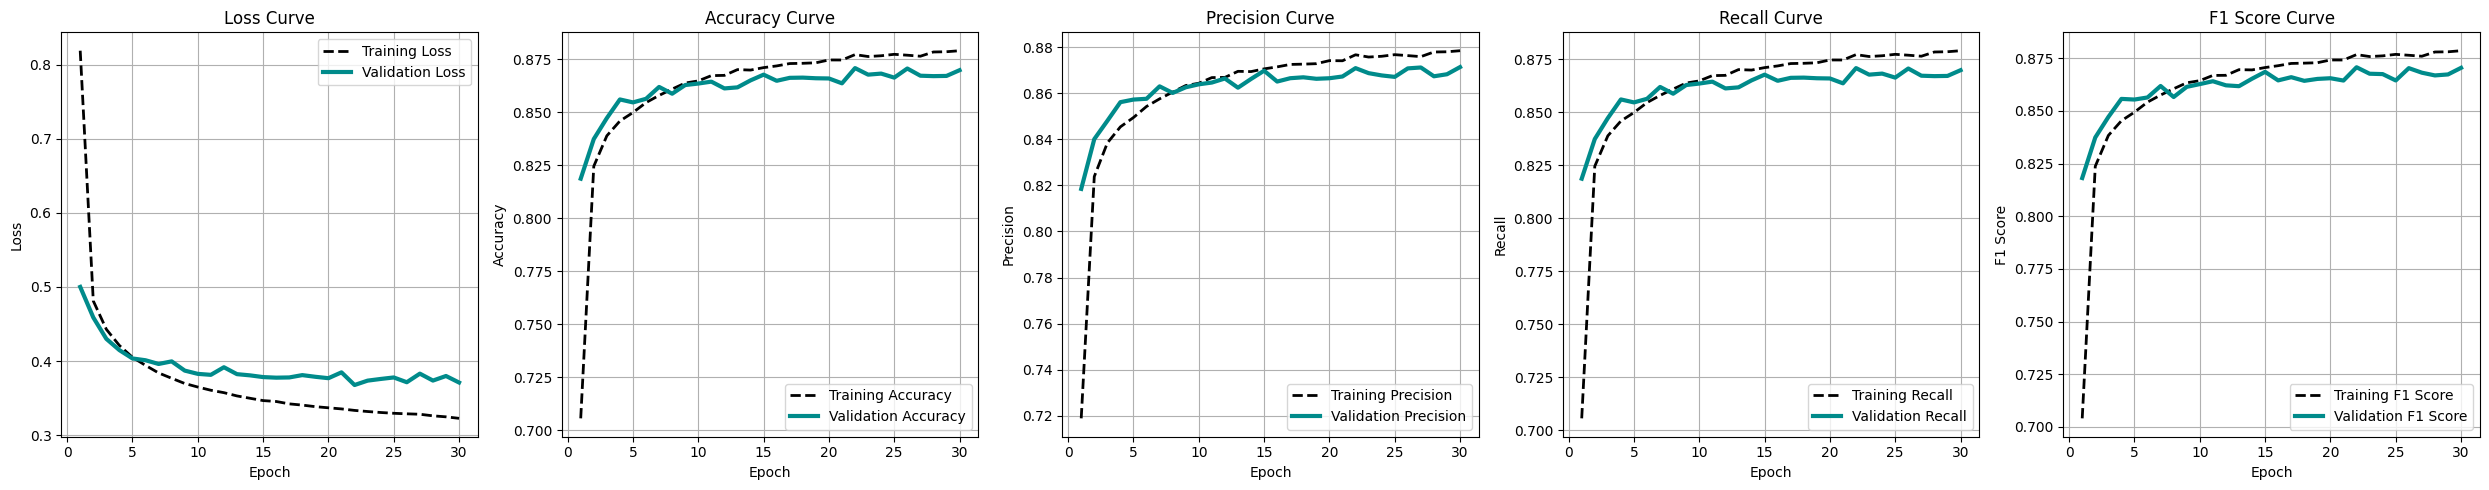

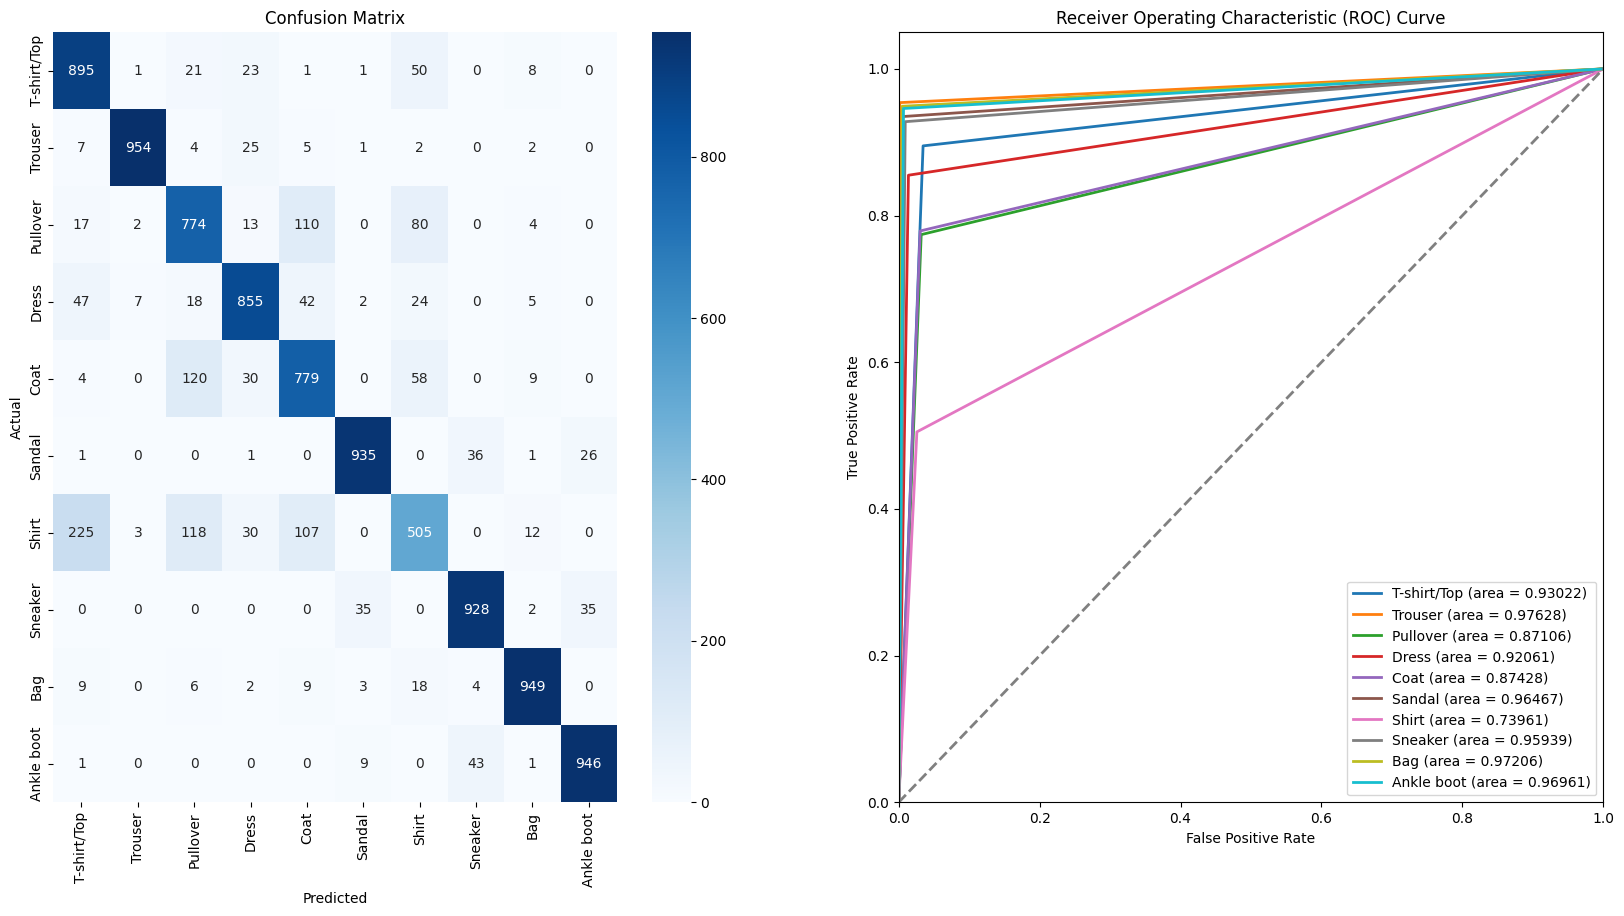

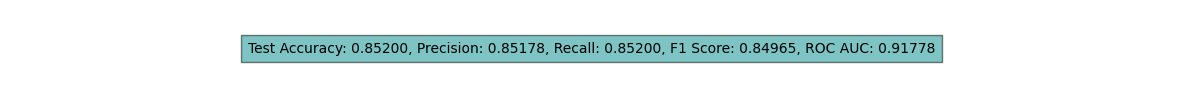

CPU times: user 4.53 s, sys: 268 ms, total: 4.79 s
Wall time: 3.69 s


In [12]:
%%time
set_seed()
cl3 = Classifier(vae3, dataset='Fashion MNIST', input_dim=72)
cl3.load_and_plot('Models/FashionMNIST/ntd_cl.pth', test_loader)

### VAE-CPD-NN

Model loaded from Models/FashionMNIST/cpd_nn_cl.pth


<IPython.core.display.Latex object>

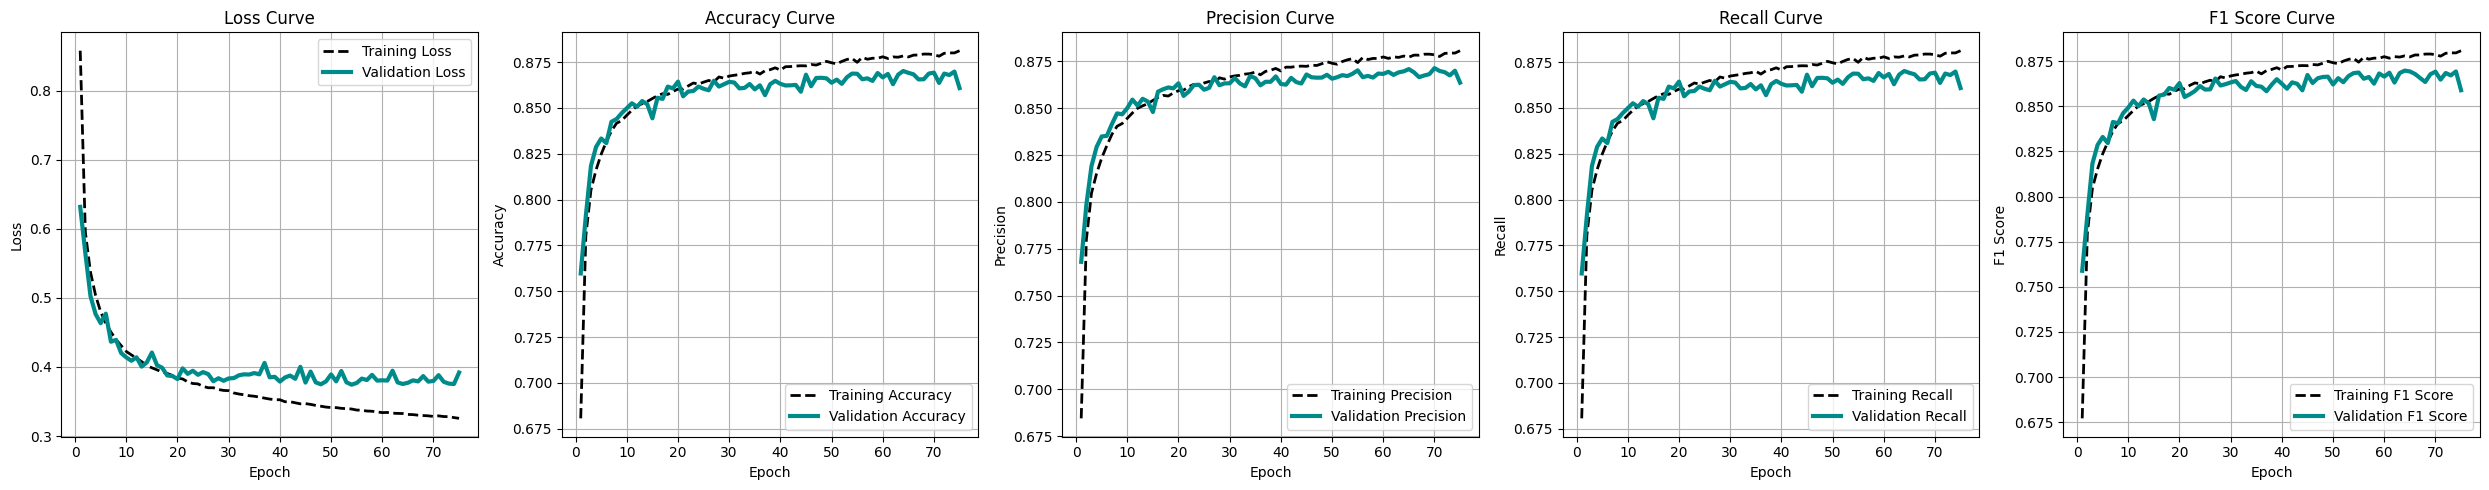

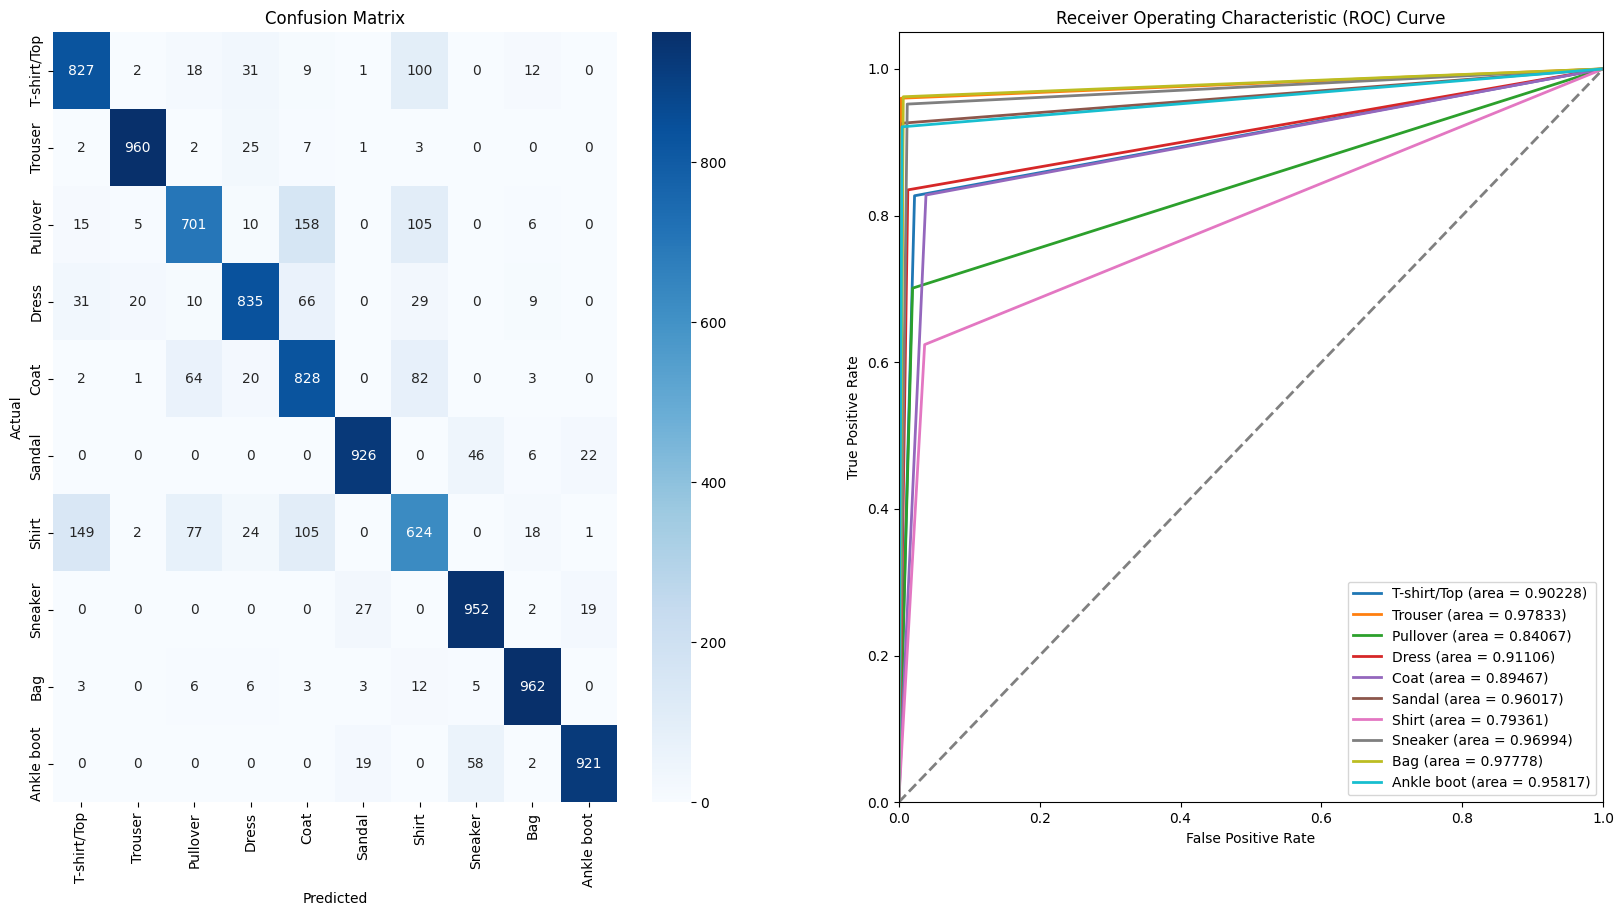

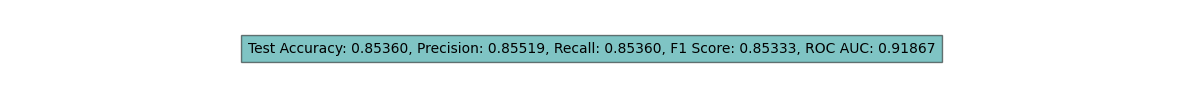

CPU times: user 4.42 s, sys: 343 ms, total: 4.77 s
Wall time: 3.36 s


In [13]:
%%time
set_seed()
cl4 = Classifier(vae4, dataset='Fashion MNIST', input_dim=72)
cl4.load_and_plot('Models/FashionMNIST/cpd_nn_cl.pth', test_loader)

### mVAE-CPD-NN

Model loaded from Models/FashionMNIST/mcpd_nn_cl.pth


<IPython.core.display.Latex object>

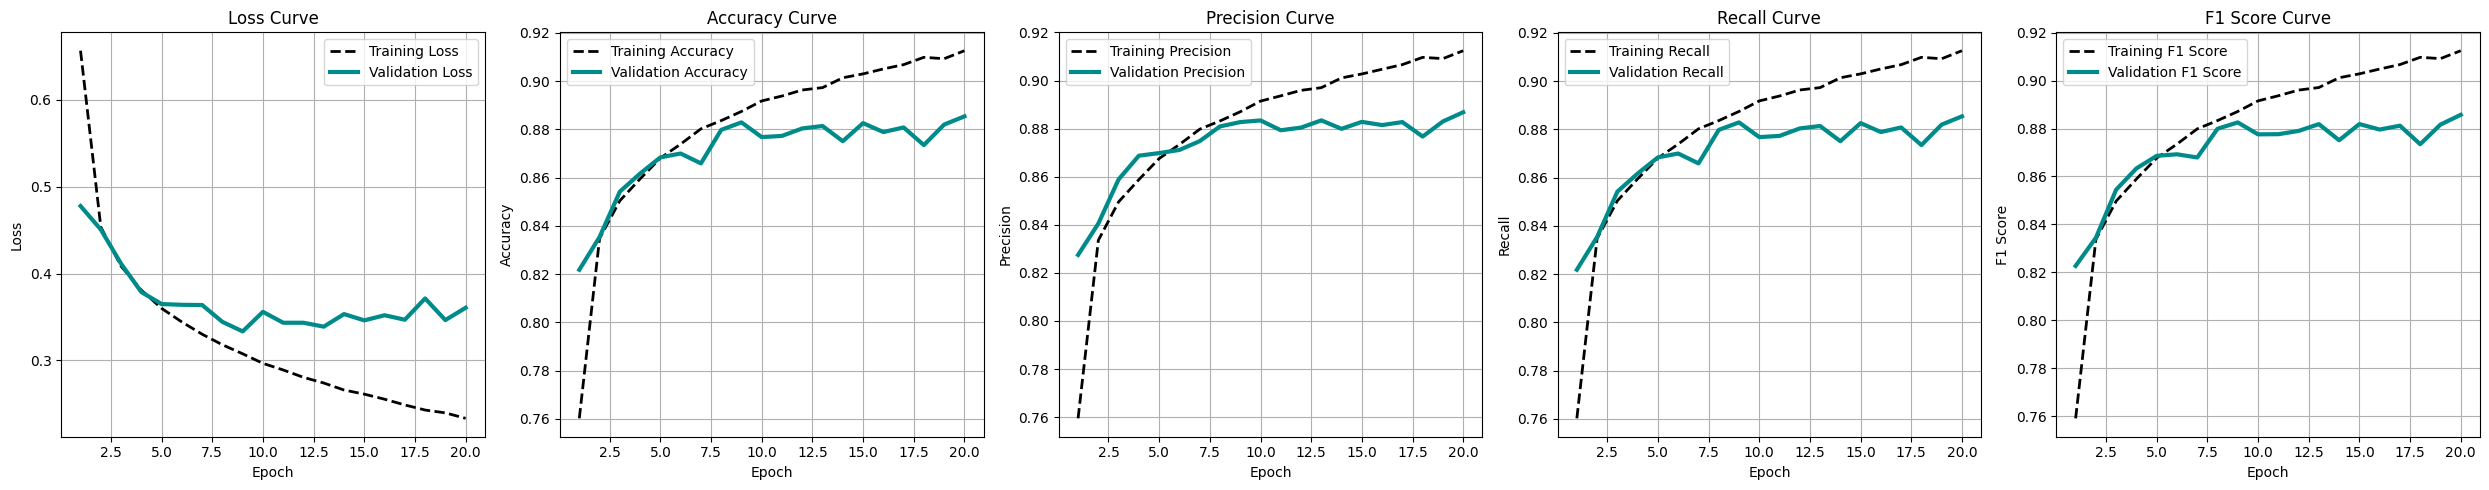

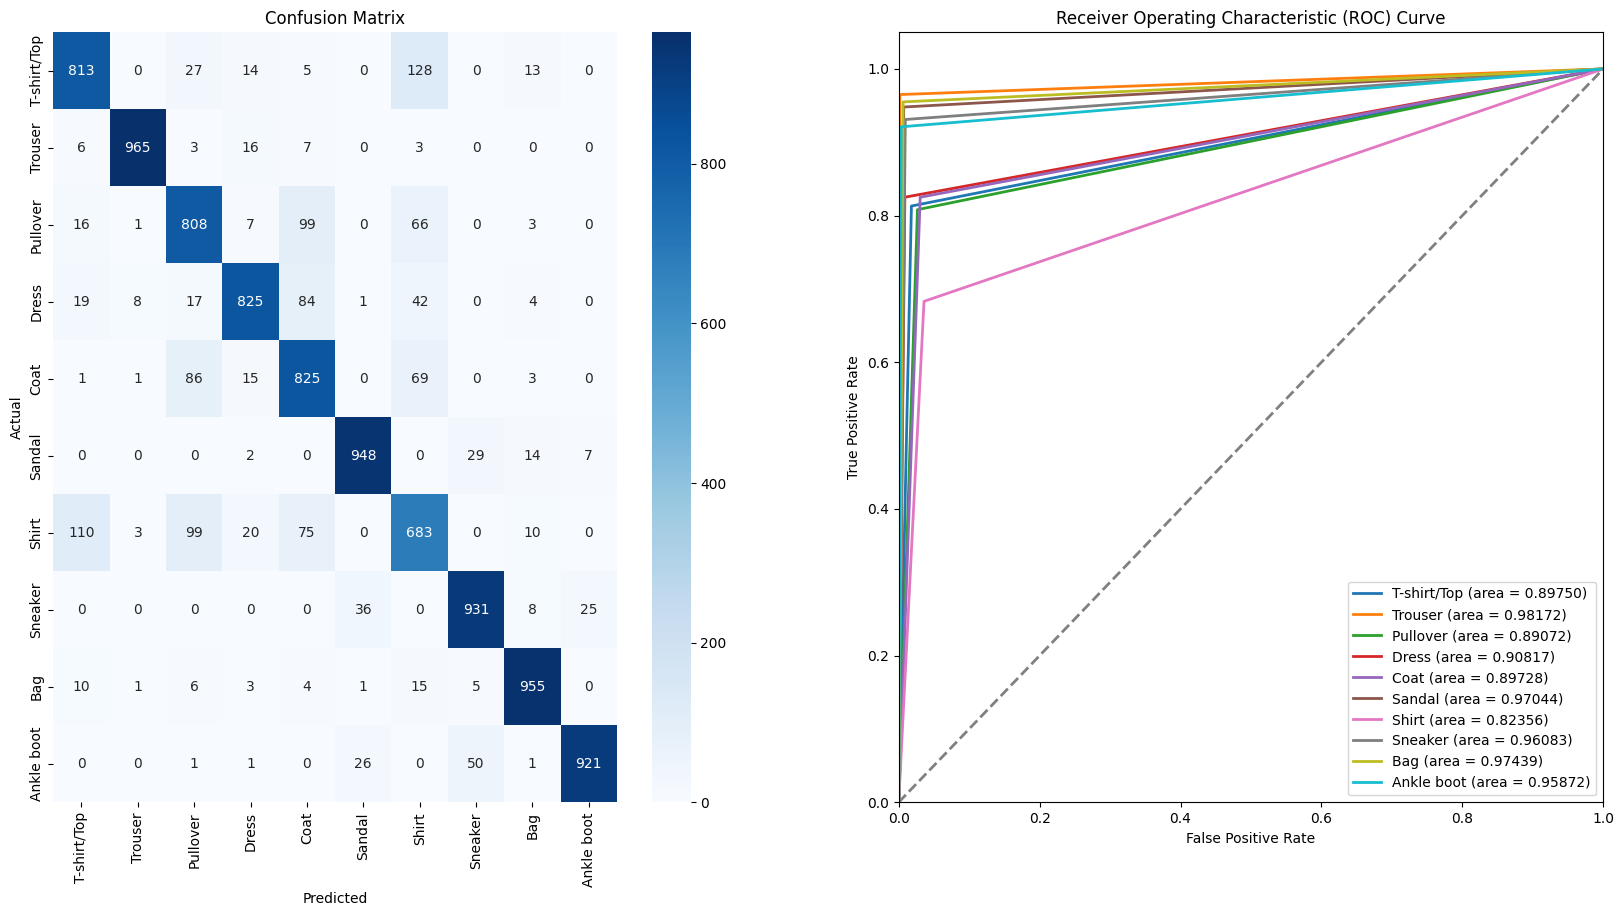

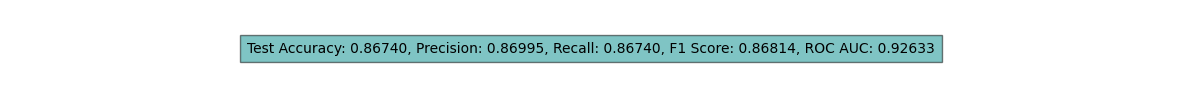

CPU times: user 3.66 s, sys: 339 ms, total: 4 s
Wall time: 2.97 s


In [14]:
%%time
set_seed()
cl4m = Classifier(vae4m, dataset='Fashion MNIST', input_dim=130)
cl4m.load_and_plot('Models/FashionMNIST/mcpd_nn_cl.pth', test_loader)

### sVAE-CPD-NN

Model loaded from Models/FashionMNIST/scpd_nn_cl.pth


<IPython.core.display.Latex object>

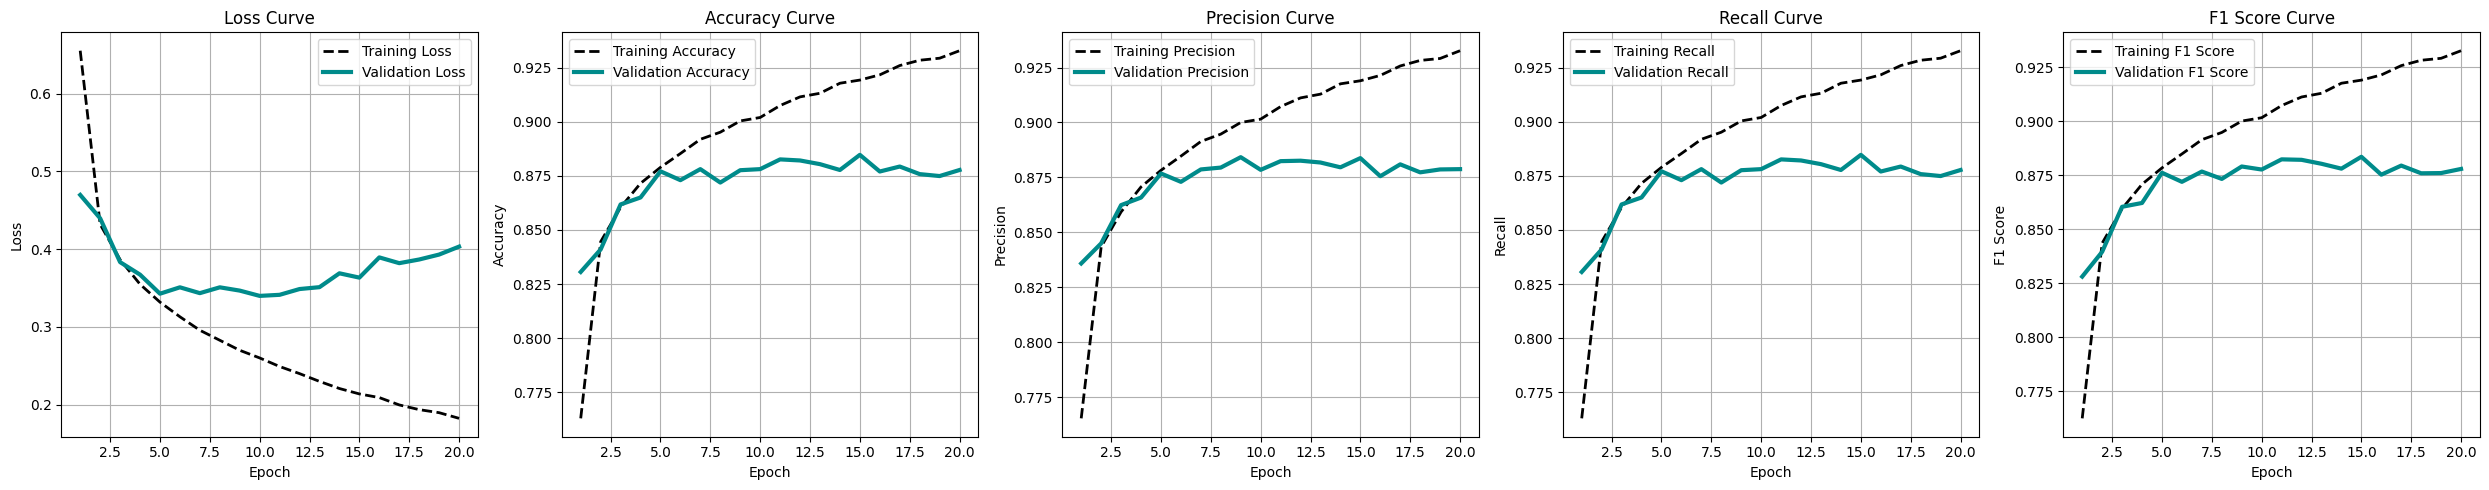

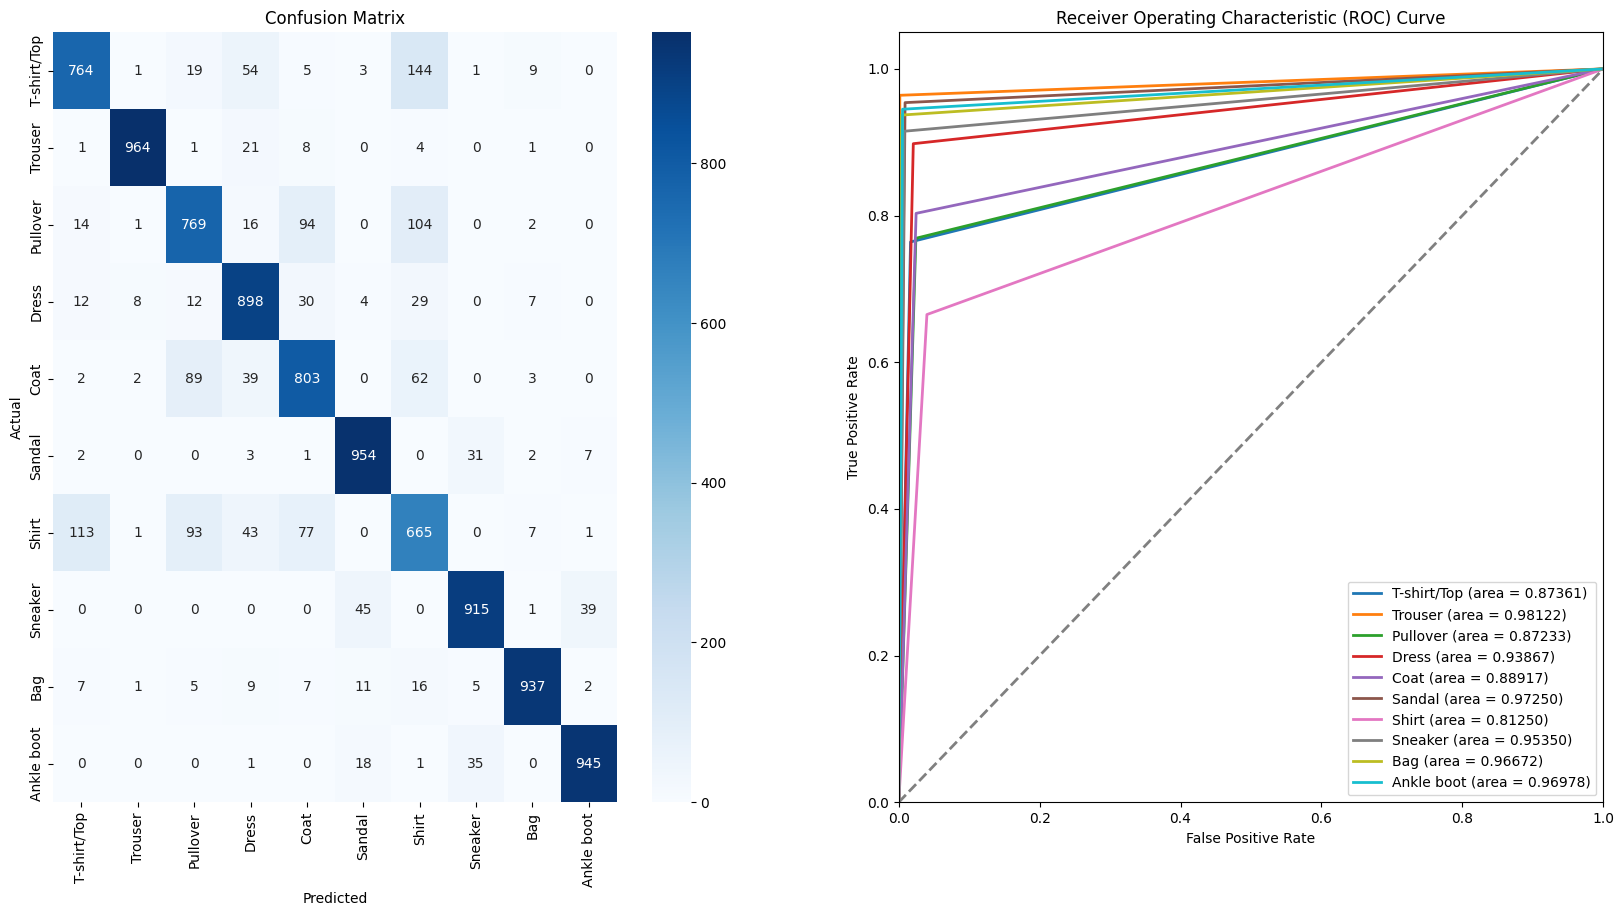

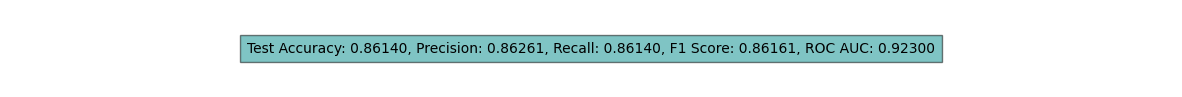

CPU times: user 5.71 s, sys: 343 ms, total: 6.05 s
Wall time: 4.36 s


In [15]:
%%time
set_seed()
cl4s = Classifier(vae4s, dataset='Fashion MNIST', input_dim=145)
cl4s.load_and_plot('Models/FashionMNIST/scpd_nn_cl.pth', test_loader)